# Relatório de Análise e Visualização de Dados

Neste relatório iremos analisar os dados de duas entrevista feitas por:

- Francisca Guedes, a sua irmã Eduarda Guedes de 25 anos. A sua entrevista vai estar nomeada como "Entrevista_dada" (Entrevista 1)
- Mariana Martins, ao seu tio José Morgado de 72 anos. A sua entrevista vai estar nomeada como "Entrevista_tio" (Entrevista 2)

### Métricas

* Lemas e a sua frequência
* Entidades
* Classes Gramaticais
* Total de Palavras
  * Com stopwords
  * Sem stopwords
* 10 palavras mais frequentes
* Tamanho Médio de Frases
* Análise de Sentimentos

### Fazer upload das entrevistas no Collab

In [3]:
# Instalar e importar o necessário
!pip install -q spacy
!python -m spacy download pt_core_news_sm

import spacy
from google.colab import files

# Carregar modelo
nlp = spacy.load("pt_core_news_sm")

# Upload uma única vez
uploaded = files.upload()

# Ler e guardar o texto numa variável global
for file_name in uploaded:
    with open(file_name, 'r', encoding='utf-8') as f:
        Entrevista_dada = f.read()

print("✅ Texto carregado e armazenado na variável 'Entrevista_dada'")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 71.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Saving Entrevista_dada.txt to Entrevista_dada.txt
✅ Texto carregado e armazenado na variável 'Entrevista_dada'


In [10]:

import spacy
from google.colab import files

# Carregar modelo
nlp = spacy.load("pt_core_news_sm")

# Upload uma única vez
uploaded = files.upload()

# Ler e guardar o texto numa variável global
for file_name in uploaded:
    with open(file_name, 'r', encoding='utf-8') as f:
        Entrevista_tio = f.read()

print("✅ Texto carregado e armazenado na variável 'Entrevista_tio'")



Saving Entrevista_tio.txt to Entrevista_tio.txt
✅ Texto carregado e armazenado na variável 'Entrevista_tio'


## Lemas E Entidades

### Lematização e a sua Frequência

Este código identifica as palavras -> frequência -> lema. Depois guarda os resultados num ficheiro csv

### Entrevista 1

In [ ]:
import csv
from collections import Counter

# Processar o texto armazenado
doc = nlp(Entrevista_dada)

# Filtrar tokens: excluir stopwords, pontuação, espaços e não-palavras
tokens_filtrados = [
    (token.text.lower(), token.lemma_.lower())
    for token in doc
    if not token.is_stop and not token.is_punct and token.is_alpha
]

# Criar um dicionário de frequência por palavra original (ignorando caixa)
frequencia = Counter([palavra for palavra, lema in tokens_filtrados])

# Criar um dicionário para associar cada palavra ao seu lema (sem repetições)
lemas_por_palavra = {}
for palavra, lema in tokens_filtrados:
    if palavra not in lemas_por_palavra:
        lemas_por_palavra[palavra] = lema

# Mostrar resultados: palavra original, frequência e lema
print("📌 Palavra | Frequência | Lema")
print("-" * 30)
for palavra, contagem in frequencia.items():
    print(f"{palavra:<10} | {contagem:^10} | {lemas_por_palavra[palavra]}")

# Função para exportar resultados para CSV
def exportar_para_csv(nome_arquivo="resultado_palavras.csv"):
    with open(nome_arquivo, mode='w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["Palavra", "Frequência", "Lema"])
        for palavra, contagem in frequencia.items():
            writer.writerow([palavra, contagem, lemas_por_palavra[palavra]])
    print(f"\n✅ Resultados exportados para '{nome_arquivo}'")

# Chamada opcional para exportar
exportar_para_csv()


📌 Palavra | Frequência | Lema
------------------------------
nome       |     1      | nome
francisca  |     1      | francisca
vou        |     1      | ir
entrevistar |     1      | entrevistar
irmã       |     1      | irmã
eduarda    |     1      | eduarda
nasceste   |     1      | em asceste
nasci      |     1      | nasci
guimarães  |     2      | guimarães
março      |     1      | março
família    |     4      | família
escola     |     3      | escola
eras       |     2      | era
criança    |     1      | criança
bocadinho  |     3      | bocadinho
instável   |     1      | instável
escolar    |     1      | escolar
feliz      |     2      | feliz
infância   |     1      | infância
sentido    |     2      | sentido
gostavas   |     2      | gostava
jovem      |     3      | jovem
gostava    |     4      | gostar
andar      |     1      | andar
patins     |     1      | patim
amigos     |     1      | amigo
avós       |     1      | avós
monte      |     1      | monte
primos 

Gráfico

- Alguns gráficos que demonstração os lemas mais frequentes e também a estatística

📌 Top 20 Lemas Mais Frequentes:
-----------------------------------
 1. achar           |   11 ocorrências
 2. pessoa          |   10 ocorrências
 3. vida            |   10 ocorrências
 4. aprender        |    8 ocorrências
 5. jovem           |    6 ocorrências
 6. importante      |    6 ocorrências
 7. família         |    4 ocorrências
 8. gostar          |    4 ocorrências
 9. objetivo        |    4 ocorrências
10. tirar           |    4 ocorrências
11. calhar          |    4 ocorrências
12. estudar         |    4 ocorrências
13. hoje            |    4 ocorrências
14. trabalho        |    4 ocorrências
15. escola          |    3 ocorrências
16. bocadinho       |    3 ocorrências
17. gostava         |    3 ocorrências
18. marcante        |    3 ocorrências
19. acha            |    3 ocorrências
20. ter             |    3 ocorrências


<ipython-input-46-5e76cb11afa7>:296: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.



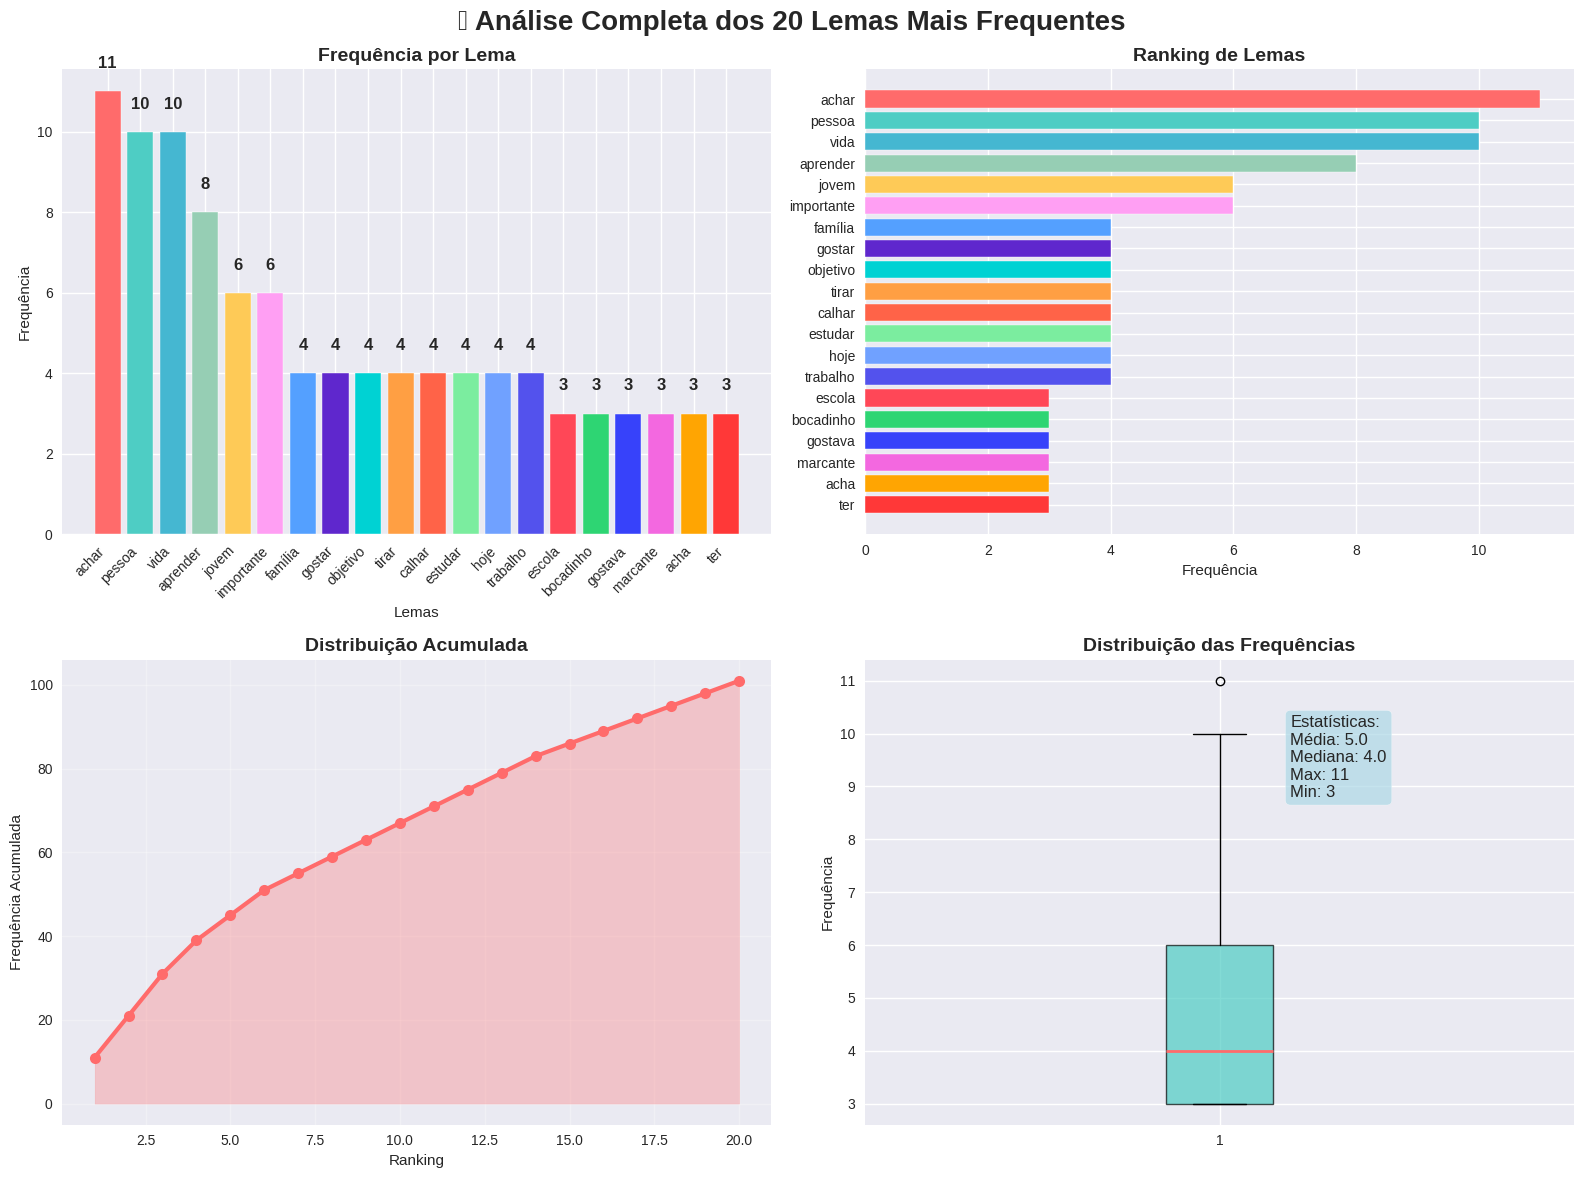


📈 RELATÓRIO DE ANÁLISE DE LEMAS
📊 Total de lemas únicos analisados: 206
🔢 Frequência total dos top 20: 101
📈 Frequência média dos top 20: 5.0
🏆 Lema mais frequente: 'achar' (11 ocorrências)
🥉 Lema menos frequente (top 20): 'ter' (3 ocorrências)

📋 Tabela Final dos Top 20 Lemas:
 Ranking       Lema  Frequência Percentual
       1      achar          11      10.9%
       2     pessoa          10       9.9%
       3       vida          10       9.9%
       4   aprender           8       7.9%
       5      jovem           6       5.9%
       6 importante           6       5.9%
       7    família           4       4.0%
       8     gostar           4       4.0%
       9   objetivo           4       4.0%
      10      tirar           4       4.0%
      11     calhar           4       4.0%
      12    estudar           4       4.0%
      13       hoje           4       4.0%
      14   trabalho           4       4.0%
      15     escola           3       3.0%
      16  bocadinho           3 

In [ ]:
# Instalar bibliotecas necessárias (execute apenas uma vez)
!pip install plotly spacy matplotlib seaborn

# Importar bibliotecas
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
import spacy

# Seu código original (adaptado)
# Assumindo que você já tem o nlp e Entrevista_dada definidos
# nlp = spacy.load("pt_core_news_sm")  # Descomente se necessário

# Processar o texto armazenado
doc = nlp(Entrevista_dada)

# Filtrar tokens: excluir stopwords, pontuação, espaços e não-palavras
tokens_filtrados = [
    (token.text.lower(), token.lemma_.lower())
    for token in doc
    if not token.is_stop and not token.is_punct and token.is_alpha
]

# Criar um dicionário de frequência por lema
frequencia_lemas = Counter([lema for palavra, lema in tokens_filtrados])

# Obter os 20 lemas mais frequentes
top_20_lemas = frequencia_lemas.most_common(20)

# Preparar dados para visualização
lemas = [item[0] for item in top_20_lemas]
frequencias = [item[1] for item in top_20_lemas]

# Criar DataFrame para facilitar manipulação
df = pd.DataFrame({
    'Lema': lemas,
    'Frequência': frequencias,
    'Rank': range(1, 21)
})

print("📌 Top 20 Lemas Mais Frequentes:")
print("-" * 35)
for i, (lema, freq) in enumerate(top_20_lemas, 1):
    print(f"{i:2d}. {lema:<15} | {freq:>4} ocorrências")

# ========== GRÁFICO INTERATIVO COM PLOTLY ==========

# Definir cores vibrantes
cores = [
    '#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57',
    '#FF9FF3', '#54A0FF', '#5F27CD', '#00D2D3', '#FF9F43',
    '#FF6348', '#7BED9F', '#70A1FF', '#5352ED', '#FF4757',
    '#2ED573', '#3742FA', '#F368E0', '#FFA502', '#FF3838'
]

# 1. Gráfico de Barras Interativo Principal
fig1 = go.Figure()

fig1.add_trace(go.Bar(
    x=lemas,
    y=frequencias,
    marker=dict(
        color=cores[:20],
        line=dict(color='rgba(0,0,0,0.1)', width=1)
    ),
    text=frequencias,
    textposition='auto',
    textfont=dict(size=12, color='white', family='Arial Black'),
    hovertemplate='<b>%{x}</b><br>' +
                  'Frequência: %{y}<br>' +
                  'Ranking: #%{customdata}<br>' +
                  '<extra></extra>',
    customdata=df['Rank']
))

fig1.update_layout(
    title={
        'text': '📊 Top 20 Lemas Mais Frequentes',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 24, 'family': 'Arial Black', 'color': '#2C3E50'}
    },
    xaxis=dict(
        title='Lemas',
        tickangle=-45,
        tickfont=dict(size=12, family='Arial'),
        showgrid=True,
        gridcolor='rgba(128,128,128,0.2)'
    ),
    yaxis=dict(
        title='Frequência',
        tickfont=dict(size=12, family='Arial'),
        showgrid=True,
        gridcolor='rgba(128,128,128,0.2)'
    ),
    plot_bgcolor='rgba(248,249,250,0.8)',
    paper_bgcolor='white',
    showlegend=False,
    width=1000,
    height=600,
    margin=dict(l=80, r=80, t=100, b=120)
)

fig1.show()

# 2. Gráfico de Pizza/Rosca Interativo
fig2 = go.Figure()

fig2.add_trace(go.Pie(
    labels=lemas,
    values=frequencias,
    hole=0.4,
    marker=dict(colors=cores[:20], line=dict(color='white', width=2)),
    textinfo='label+percent',
    textposition='auto',
    hovertemplate='<b>%{label}</b><br>' +
                  'Frequência: %{value}<br>' +
                  'Percentual: %{percent}<br>' +
                  '<extra></extra>'
))

fig2.update_layout(
    title={
        'text': '🍩 Distribuição dos 20 Lemas Mais Frequentes',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 24, 'family': 'Arial Black', 'color': '#2C3E50'}
    },
    width=800,
    height=600,
    showlegend=True,
    legend=dict(
        orientation="v",
        yanchor="middle",
        y=0.5,
        xanchor="left",
        x=1.02
    )
)

fig2.show()

# 3. Gráfico de Barras Horizontais
fig3 = go.Figure()

fig3.add_trace(go.Bar(
    x=frequencias,
    y=lemas,
    orientation='h',
    marker=dict(color=cores[:20]),
    text=frequencias,
    textposition='auto',
    textfont=dict(size=11, color='white', family='Arial Black')
))

fig3.update_layout(
    title={
        'text': '📈 Ranking de Lemas (Horizontal)',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 24, 'family': 'Arial Black', 'color': '#2C3E50'}
    },
    xaxis_title='Frequência',
    yaxis_title='Lemas',
    yaxis=dict(categoryorder='total ascending'),
    plot_bgcolor='rgba(248,249,250,0.8)',
    width=900,
    height=700
)

fig3.show()

# 4. Gráfico combinado com subplots
fig4 = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Top 10 Lemas', 'Últimos 10 Lemas', 'Distribuição Acumulada', 'Estatísticas'),
    specs=[[{"type": "bar"}, {"type": "bar"}],
           [{"type": "scatter"}, {"type": "table"}]]
)

# Top 10
fig4.add_trace(
    go.Bar(x=lemas[:10], y=frequencias[:10],
           marker_color=cores[:10], name="Top 10"),
    row=1, col=1
)

# Últimos 10
fig4.add_trace(
    go.Bar(x=lemas[10:], y=frequencias[10:],
           marker_color=cores[10:20], name="Últimos 10"),
    row=1, col=2
)

# Distribuição acumulada
freq_acumulada = [sum(frequencias[:i+1]) for i in range(len(frequencias))]
fig4.add_trace(
    go.Scatter(x=list(range(1, 21)), y=freq_acumulada,
               mode='lines+markers', name="Acumulado",
               line=dict(color='#FF6B6B', width=3)),
    row=2, col=1
)

# Tabela de estatísticas
stats_data = [
    ['Total de Lemas', len(lemas)],
    ['Frequência Total', sum(frequencias)],
    ['Frequência Média', round(sum(frequencias)/len(frequencias), 1)],
    ['Frequência Máxima', max(frequencias)],
    ['Frequência Mínima', min(frequencias)],
    ['Desvio Padrão', round(pd.Series(frequencias).std(), 1)]
]

fig4.add_trace(
    go.Table(
        header=dict(values=['Estatística', 'Valor'],
                   fill_color='#667EEA', font_color='white'),
        cells=dict(values=list(zip(*stats_data)),
                  fill_color='#F8F9FA')
    ),
    row=2, col=2
)

fig4.update_layout(
    title_text="📊 Dashboard Completo de Análise de Lemas",
    title_font_size=20,
    showlegend=False,
    height=800
)

fig4.show()

# ========== GRÁFICO ESTÁTICO COM MATPLOTLIB/SEABORN ==========

# Configurar estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Criar figura com múltiplos subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📊 Análise Completa dos 20 Lemas Mais Frequentes',
             fontsize=20, fontweight='bold', y=0.98)

# 1. Gráfico de barras vertical
bars1 = ax1.bar(range(len(lemas)), frequencias, color=cores[:20])
ax1.set_title('Frequência por Lema', fontsize=14, fontweight='bold')
ax1.set_xlabel('Lemas')
ax1.set_ylabel('Frequência')
ax1.set_xticks(range(len(lemas)))
ax1.set_xticklabels(lemas, rotation=45, ha='right')

# Adicionar valores nas barras
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# 2. Gráfico de barras horizontal
bars2 = ax2.barh(range(len(lemas)), frequencias, color=cores[:20])
ax2.set_title('Ranking de Lemas', fontsize=14, fontweight='bold')
ax2.set_xlabel('Frequência')
ax2.set_yticks(range(len(lemas)))
ax2.set_yticklabels(lemas)
ax2.invert_yaxis()

# 3. Gráfico de linha - distribuição acumulada
ax3.plot(range(1, 21), freq_acumulada, marker='o', linewidth=3,
         markersize=8, color='#FF6B6B')
ax3.fill_between(range(1, 21), freq_acumulada, alpha=0.3, color='#FF6B6B')
ax3.set_title('Distribuição Acumulada', fontsize=14, fontweight='bold')
ax3.set_xlabel('Ranking')
ax3.set_ylabel('Frequência Acumulada')
ax3.grid(True, alpha=0.3)

# 4. Boxplot das frequências
ax4.boxplot(frequencias, patch_artist=True,
           boxprops=dict(facecolor='#4ECDC4', alpha=0.7),
           medianprops=dict(color='#FF6B6B', linewidth=2))
ax4.set_title('Distribuição das Frequências', fontsize=14, fontweight='bold')
ax4.set_ylabel('Frequência')

# Adicionar estatísticas no boxplot
stats_text = f'''Estatísticas:
Média: {sum(frequencias)/len(frequencias):.1f}
Mediana: {sorted(frequencias)[len(frequencias)//2]:.1f}
Max: {max(frequencias)}
Min: {min(frequencias)}'''

ax4.text(1.1, max(frequencias)*0.8, stats_text,
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', alpha=0.7))

plt.tight_layout()
plt.show()

# ========== RELATÓRIO FINAL ==========
print("\n" + "="*60)
print("📈 RELATÓRIO DE ANÁLISE DE LEMAS")
print("="*60)
print(f"📊 Total de lemas únicos analisados: {len(frequencia_lemas)}")
print(f"🔢 Frequência total dos top 20: {sum(frequencias)}")
print(f"📈 Frequência média dos top 20: {sum(frequencias)/len(frequencias):.1f}")
print(f"🏆 Lema mais frequente: '{lemas[0]}' ({frequencias[0]} ocorrências)")
print(f"🥉 Lema menos frequente (top 20): '{lemas[-1]}' ({frequencias[-1]} ocorrências)")
print("="*60)

# Criar DataFrame final para exportação (opcional)
df_final = pd.DataFrame({
    'Ranking': range(1, 21),
    'Lema': lemas,
    'Frequência': frequencias,
    'Percentual': [f"{(freq/sum(frequencias)*100):.1f}%" for freq in frequencias]
})

print("\n📋 Tabela Final dos Top 20 Lemas:")
print(df_final.to_string(index=False))

# Para salvar a tabela (descomente se necessário)
# df_final.to_csv('top_20_lemas.csv', index=False)
# print("\n💾 Tabela salva como 'top_20_lemas.csv'")

### Entrevista 2

In [ ]:
import csv
from collections import Counter

# Processar o texto armazenado
doc = nlp(Entrevista_dada)

# Filtrar tokens: excluir stopwords, pontuação, espaços e não-palavras
tokens_filtrados = [
    (token.text.lower(), token.lemma_.lower())
    for token in doc
    if not token.is_stop and not token.is_punct and token.is_alpha
]

# Criar um dicionário de frequência por palavra original (ignorando caixa)
frequencia = Counter([palavra for palavra, lema in tokens_filtrados])

# Criar um dicionário para associar cada palavra ao seu lema (sem repetições)
lemas_por_palavra = {}
for palavra, lema in tokens_filtrados:
    if palavra not in lemas_por_palavra:
        lemas_por_palavra[palavra] = lema

# Mostrar resultados: palavra original, frequência e lema
print("📌 Palavra | Frequência | Lema")
print("-" * 30)
for palavra, contagem in frequencia.items():
    print(f"{palavra:<10} | {contagem:^10} | {lemas_por_palavra[palavra]}")

# Função para exportar resultados para CSV
def exportar_para_csv(nome_arquivo="resultado_palavras.csv"):
    with open(nome_arquivo, mode='w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["Palavra", "Frequência", "Lema"])
        for palavra, contagem in frequencia.items():
            writer.writerow([palavra, contagem, lemas_por_palavra[palavra]])
    print(f"\n✅ Resultados exportados para '{nome_arquivo}'")

# Chamada opcional para exportar
exportar_para_csv()


📌 Palavra | Frequência | Lema
------------------------------
nome       |     1      | nome
francisca  |     1      | francisca
vou        |     1      | ir
entrevistar |     1      | entrevistar
irmã       |     1      | irmã
eduarda    |     1      | eduarda
nasceste   |     1      | em asceste
nasci      |     1      | nasci
guimarães  |     2      | guimarães
março      |     1      | março
família    |     4      | família
escola     |     3      | escola
eras       |     2      | era
criança    |     1      | criança
bocadinho  |     3      | bocadinho
instável   |     1      | instável
escolar    |     1      | escolar
feliz      |     2      | feliz
infância   |     1      | infância
sentido    |     2      | sentido
gostavas   |     2      | gostava
jovem      |     3      | jovem
gostava    |     4      | gostar
andar      |     1      | andar
patins     |     1      | patim
amigos     |     1      | amigo
avós       |     1      | avós
monte      |     1      | monte
primos 

📌 Top 20 Lemas Mais Frequentes:
-----------------------------------
 1. pessoa          |   25 ocorrências
 2. ter             |   23 ocorrências
 3. vida            |   20 ocorrências
 4. achar           |   19 ocorrências
 5. gostar          |   18 ocorrências
 6. importante      |   18 ocorrências
 7. trabalho        |   16 ocorrências
 8. viver           |   16 ocorrências
 9. haver           |   15 ocorrências
10. gente           |   14 ocorrências
11. ir              |   12 ocorrências
12. pensar          |   12 ocorrências
13. muito           |   12 ocorrências
14. falar           |   12 ocorrências
15. coisa           |   10 ocorrências
16. trabalhar       |   10 ocorrências
17. hoje            |   10 ocorrências
18. jovem           |    9 ocorrências
19. estudar         |    9 ocorrências
20. escola          |    8 ocorrências


<ipython-input-48-ad45b867d17e>:296: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.



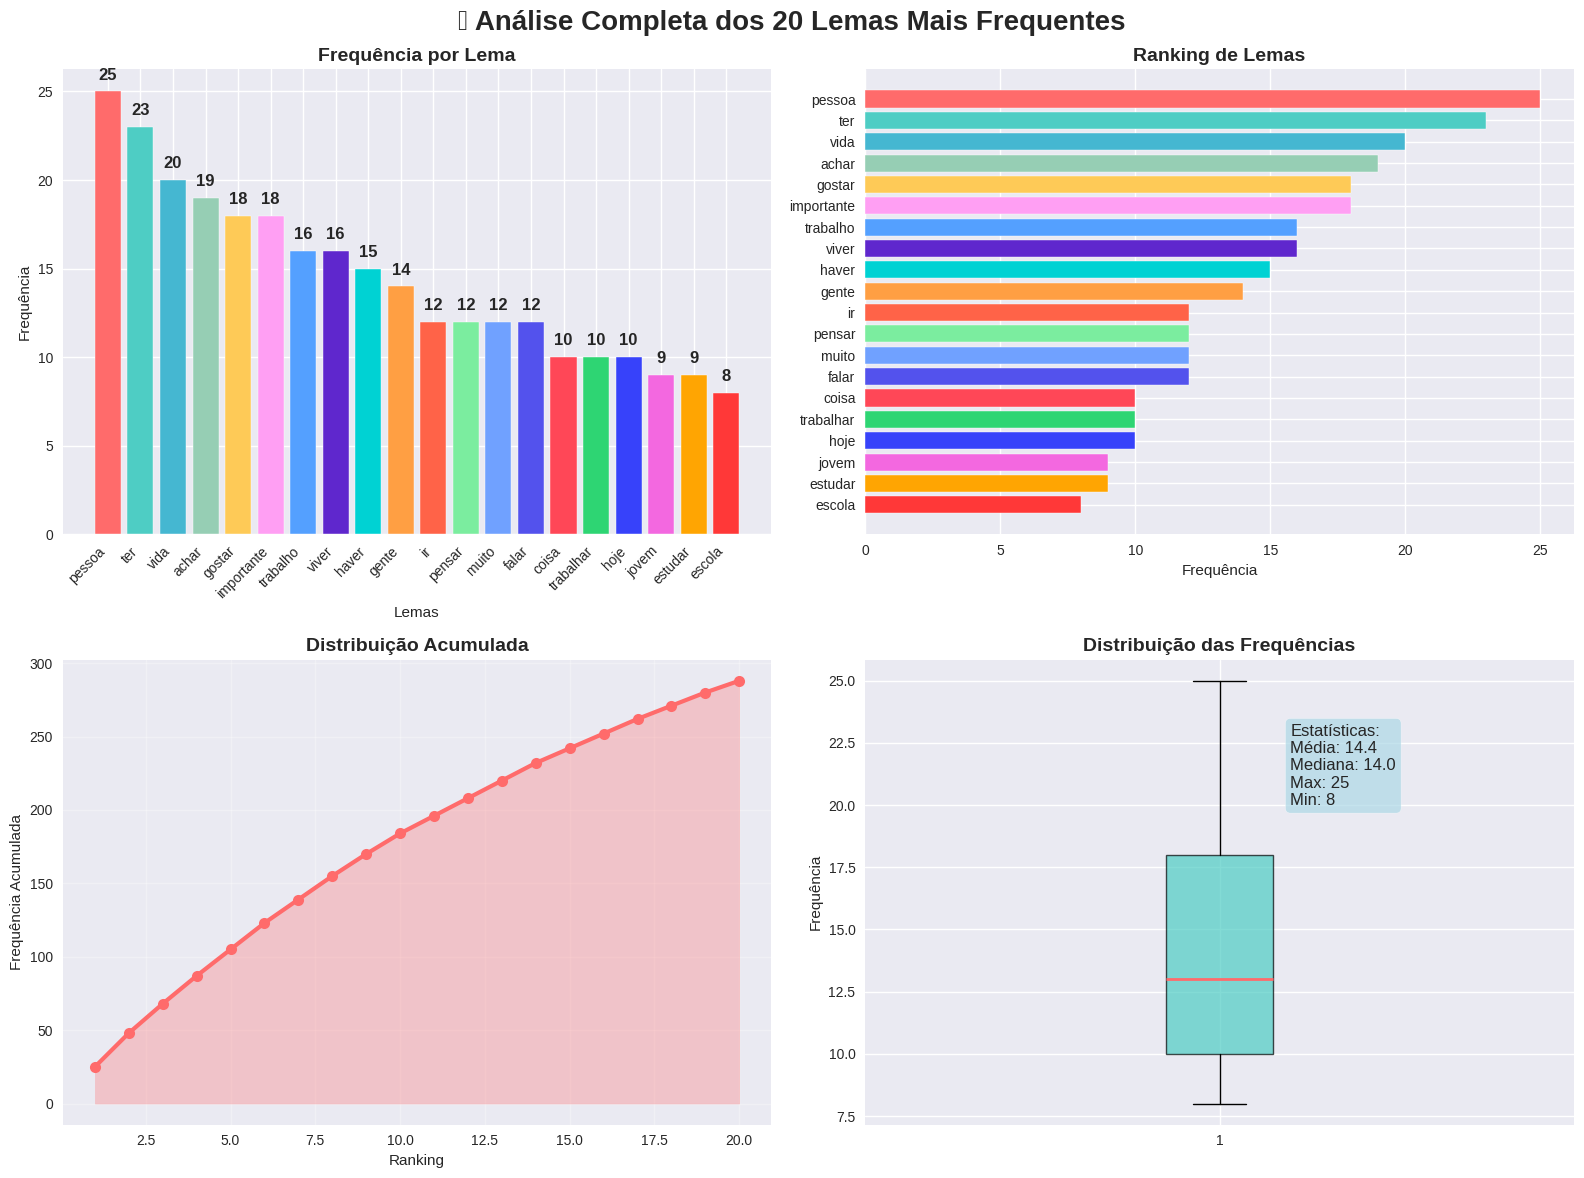


📈 RELATÓRIO DE ANÁLISE DE LEMAS
📊 Total de lemas únicos analisados: 379
🔢 Frequência total dos top 20: 288
📈 Frequência média dos top 20: 14.4
🏆 Lema mais frequente: 'pessoa' (25 ocorrências)
🥉 Lema menos frequente (top 20): 'escola' (8 ocorrências)

📋 Tabela Final dos Top 20 Lemas:
 Ranking       Lema  Frequência Percentual
       1     pessoa          25       8.7%
       2        ter          23       8.0%
       3       vida          20       6.9%
       4      achar          19       6.6%
       5     gostar          18       6.2%
       6 importante          18       6.2%
       7   trabalho          16       5.6%
       8      viver          16       5.6%
       9      haver          15       5.2%
      10      gente          14       4.9%
      11         ir          12       4.2%
      12     pensar          12       4.2%
      13      muito          12       4.2%
      14      falar          12       4.2%
      15      coisa          10       3.5%
      16  trabalhar        

In [ ]:
# Instalar bibliotecas necessárias (execute apenas uma vez)
!pip install plotly spacy matplotlib seaborn

# Importar bibliotecas
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
import spacy

# Seu código original (adaptado)
# Assumindo que você já tem o nlp e Entrevista_dada definidos
# nlp = spacy.load("pt_core_news_sm")  # Descomente se necessário

# Processar o texto armazenado
doc = nlp(Entrevista_tio)

# Filtrar tokens: excluir stopwords, pontuação, espaços e não-palavras
tokens_filtrados = [
    (token.text.lower(), token.lemma_.lower())
    for token in doc
    if not token.is_stop and not token.is_punct and token.is_alpha
]

# Criar um dicionário de frequência por lema
frequencia_lemas = Counter([lema for palavra, lema in tokens_filtrados])

# Obter os 20 lemas mais frequentes
top_20_lemas = frequencia_lemas.most_common(20)

# Preparar dados para visualização
lemas = [item[0] for item in top_20_lemas]
frequencias = [item[1] for item in top_20_lemas]

# Criar DataFrame para facilitar manipulação
df = pd.DataFrame({
    'Lema': lemas,
    'Frequência': frequencias,
    'Rank': range(1, 21)
})

print("📌 Top 20 Lemas Mais Frequentes:")
print("-" * 35)
for i, (lema, freq) in enumerate(top_20_lemas, 1):
    print(f"{i:2d}. {lema:<15} | {freq:>4} ocorrências")

# ========== GRÁFICO INTERATIVO COM PLOTLY ==========

# Definir cores vibrantes
cores = [
    '#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57',
    '#FF9FF3', '#54A0FF', '#5F27CD', '#00D2D3', '#FF9F43',
    '#FF6348', '#7BED9F', '#70A1FF', '#5352ED', '#FF4757',
    '#2ED573', '#3742FA', '#F368E0', '#FFA502', '#FF3838'
]

# 1. Gráfico de Barras Interativo Principal
fig1 = go.Figure()

fig1.add_trace(go.Bar(
    x=lemas,
    y=frequencias,
    marker=dict(
        color=cores[:20],
        line=dict(color='rgba(0,0,0,0.1)', width=1)
    ),
    text=frequencias,
    textposition='auto',
    textfont=dict(size=12, color='white', family='Arial Black'),
    hovertemplate='<b>%{x}</b><br>' +
                  'Frequência: %{y}<br>' +
                  'Ranking: #%{customdata}<br>' +
                  '<extra></extra>',
    customdata=df['Rank']
))

fig1.update_layout(
    title={
        'text': '📊 Top 20 Lemas Mais Frequentes',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 24, 'family': 'Arial Black', 'color': '#2C3E50'}
    },
    xaxis=dict(
        title='Lemas',
        tickangle=-45,
        tickfont=dict(size=12, family='Arial'),
        showgrid=True,
        gridcolor='rgba(128,128,128,0.2)'
    ),
    yaxis=dict(
        title='Frequência',
        tickfont=dict(size=12, family='Arial'),
        showgrid=True,
        gridcolor='rgba(128,128,128,0.2)'
    ),
    plot_bgcolor='rgba(248,249,250,0.8)',
    paper_bgcolor='white',
    showlegend=False,
    width=1000,
    height=600,
    margin=dict(l=80, r=80, t=100, b=120)
)

fig1.show()

# 2. Gráfico de Pizza/Rosca Interativo
fig2 = go.Figure()

fig2.add_trace(go.Pie(
    labels=lemas,
    values=frequencias,
    hole=0.4,
    marker=dict(colors=cores[:20], line=dict(color='white', width=2)),
    textinfo='label+percent',
    textposition='auto',
    hovertemplate='<b>%{label}</b><br>' +
                  'Frequência: %{value}<br>' +
                  'Percentual: %{percent}<br>' +
                  '<extra></extra>'
))

fig2.update_layout(
    title={
        'text': '🍩 Distribuição dos 20 Lemas Mais Frequentes',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 24, 'family': 'Arial Black', 'color': '#2C3E50'}
    },
    width=800,
    height=600,
    showlegend=True,
    legend=dict(
        orientation="v",
        yanchor="middle",
        y=0.5,
        xanchor="left",
        x=1.02
    )
)

fig2.show()

# 3. Gráfico de Barras Horizontais
fig3 = go.Figure()

fig3.add_trace(go.Bar(
    x=frequencias,
    y=lemas,
    orientation='h',
    marker=dict(color=cores[:20]),
    text=frequencias,
    textposition='auto',
    textfont=dict(size=11, color='white', family='Arial Black')
))

fig3.update_layout(
    title={
        'text': '📈 Ranking de Lemas (Horizontal)',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 24, 'family': 'Arial Black', 'color': '#2C3E50'}
    },
    xaxis_title='Frequência',
    yaxis_title='Lemas',
    yaxis=dict(categoryorder='total ascending'),
    plot_bgcolor='rgba(248,249,250,0.8)',
    width=900,
    height=700
)

fig3.show()

# 4. Gráfico combinado com subplots
fig4 = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Top 10 Lemas', 'Últimos 10 Lemas', 'Distribuição Acumulada', 'Estatísticas'),
    specs=[[{"type": "bar"}, {"type": "bar"}],
           [{"type": "scatter"}, {"type": "table"}]]
)

# Top 10
fig4.add_trace(
    go.Bar(x=lemas[:10], y=frequencias[:10],
           marker_color=cores[:10], name="Top 10"),
    row=1, col=1
)

# Últimos 10
fig4.add_trace(
    go.Bar(x=lemas[10:], y=frequencias[10:],
           marker_color=cores[10:20], name="Últimos 10"),
    row=1, col=2
)

# Distribuição acumulada
freq_acumulada = [sum(frequencias[:i+1]) for i in range(len(frequencias))]
fig4.add_trace(
    go.Scatter(x=list(range(1, 21)), y=freq_acumulada,
               mode='lines+markers', name="Acumulado",
               line=dict(color='#FF6B6B', width=3)),
    row=2, col=1
)

# Tabela de estatísticas
stats_data = [
    ['Total de Lemas', len(lemas)],
    ['Frequência Total', sum(frequencias)],
    ['Frequência Média', round(sum(frequencias)/len(frequencias), 1)],
    ['Frequência Máxima', max(frequencias)],
    ['Frequência Mínima', min(frequencias)],
    ['Desvio Padrão', round(pd.Series(frequencias).std(), 1)]
]

fig4.add_trace(
    go.Table(
        header=dict(values=['Estatística', 'Valor'],
                   fill_color='#667EEA', font_color='white'),
        cells=dict(values=list(zip(*stats_data)),
                  fill_color='#F8F9FA')
    ),
    row=2, col=2
)

fig4.update_layout(
    title_text="📊 Dashboard Completo de Análise de Lemas",
    title_font_size=20,
    showlegend=False,
    height=800
)

fig4.show()

# ========== GRÁFICO ESTÁTICO COM MATPLOTLIB/SEABORN ==========

# Configurar estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Criar figura com múltiplos subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📊 Análise Completa dos 20 Lemas Mais Frequentes',
             fontsize=20, fontweight='bold', y=0.98)

# 1. Gráfico de barras vertical
bars1 = ax1.bar(range(len(lemas)), frequencias, color=cores[:20])
ax1.set_title('Frequência por Lema', fontsize=14, fontweight='bold')
ax1.set_xlabel('Lemas')
ax1.set_ylabel('Frequência')
ax1.set_xticks(range(len(lemas)))
ax1.set_xticklabels(lemas, rotation=45, ha='right')

# Adicionar valores nas barras
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# 2. Gráfico de barras horizontal
bars2 = ax2.barh(range(len(lemas)), frequencias, color=cores[:20])
ax2.set_title('Ranking de Lemas', fontsize=14, fontweight='bold')
ax2.set_xlabel('Frequência')
ax2.set_yticks(range(len(lemas)))
ax2.set_yticklabels(lemas)
ax2.invert_yaxis()

# 3. Gráfico de linha - distribuição acumulada
ax3.plot(range(1, 21), freq_acumulada, marker='o', linewidth=3,
         markersize=8, color='#FF6B6B')
ax3.fill_between(range(1, 21), freq_acumulada, alpha=0.3, color='#FF6B6B')
ax3.set_title('Distribuição Acumulada', fontsize=14, fontweight='bold')
ax3.set_xlabel('Ranking')
ax3.set_ylabel('Frequência Acumulada')
ax3.grid(True, alpha=0.3)

# 4. Boxplot das frequências
ax4.boxplot(frequencias, patch_artist=True,
           boxprops=dict(facecolor='#4ECDC4', alpha=0.7),
           medianprops=dict(color='#FF6B6B', linewidth=2))
ax4.set_title('Distribuição das Frequências', fontsize=14, fontweight='bold')
ax4.set_ylabel('Frequência')

# Adicionar estatísticas no boxplot
stats_text = f'''Estatísticas:
Média: {sum(frequencias)/len(frequencias):.1f}
Mediana: {sorted(frequencias)[len(frequencias)//2]:.1f}
Max: {max(frequencias)}
Min: {min(frequencias)}'''

ax4.text(1.1, max(frequencias)*0.8, stats_text,
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', alpha=0.7))

plt.tight_layout()
plt.show()

# ========== RELATÓRIO FINAL ==========
print("\n" + "="*60)
print("📈 RELATÓRIO DE ANÁLISE DE LEMAS")
print("="*60)
print(f"📊 Total de lemas únicos analisados: {len(frequencia_lemas)}")
print(f"🔢 Frequência total dos top 20: {sum(frequencias)}")
print(f"📈 Frequência média dos top 20: {sum(frequencias)/len(frequencias):.1f}")
print(f"🏆 Lema mais frequente: '{lemas[0]}' ({frequencias[0]} ocorrências)")
print(f"🥉 Lema menos frequente (top 20): '{lemas[-1]}' ({frequencias[-1]} ocorrências)")
print("="*60)

# Criar DataFrame final para exportação (opcional)
df_final = pd.DataFrame({
    'Ranking': range(1, 21),
    'Lema': lemas,
    'Frequência': frequencias,
    'Percentual': [f"{(freq/sum(frequencias)*100):.1f}%" for freq in frequencias]
})

print("\n📋 Tabela Final dos Top 20 Lemas:")
print(df_final.to_string(index=False))

# Para salvar a tabela (descomente se necessário)
# df_final.to_csv('top_20_lemas.csv', index=False)
# print("\n💾 Tabela salva como 'top_20_lemas.csv'")

#### Comparação em Gráfico

Dois gráficos que comparam as duas entrevistas:
  - o primeiro contém as palavras frequentes de ambos
  - o segundo conntém as palavras frequentes que tem em comum

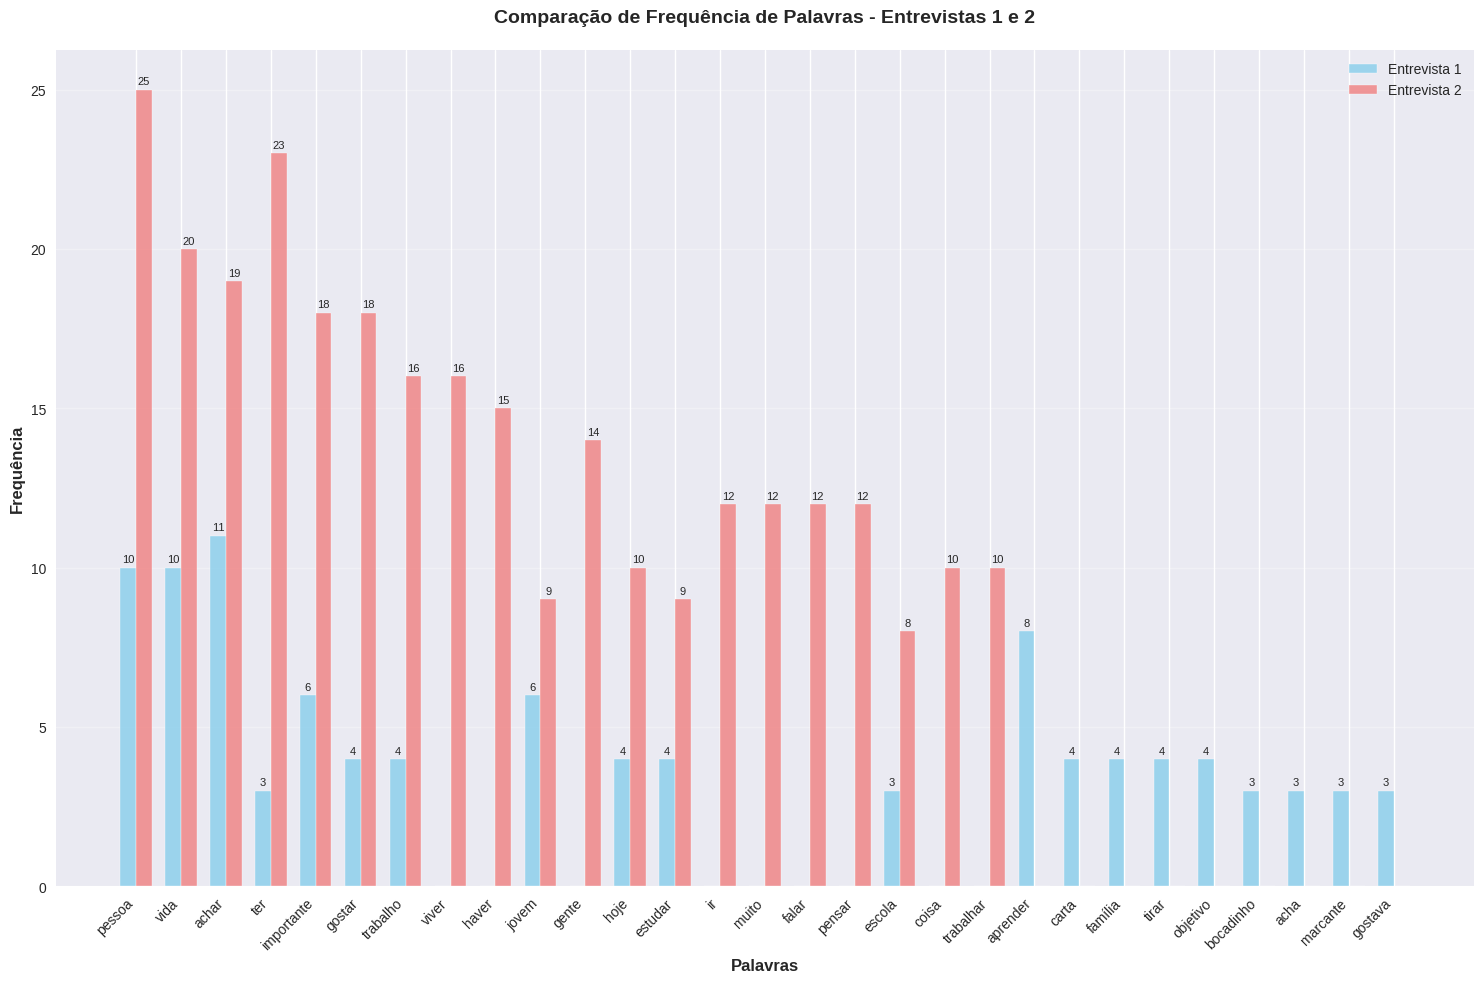

=== ESTATÍSTICAS DAS ENTREVISTAS ===
Entrevista 1: 20 palavras únicas
Entrevista 2: 20 palavras únicas
Total de palavras únicas: 29
Palavras em comum: 11

=== TOP 10 PALAVRAS MAIS FREQUENTES ===
   palavra  entrevista_1  entrevista_2  total
    pessoa            10            25     35
      vida            10            20     30
     achar            11            19     30
       ter             3            23     26
importante             6            18     24
    gostar             4            18     22
  trabalho             4            16     20
     viver             0            16     16
     haver             0            15     15
     jovem             6             9     15


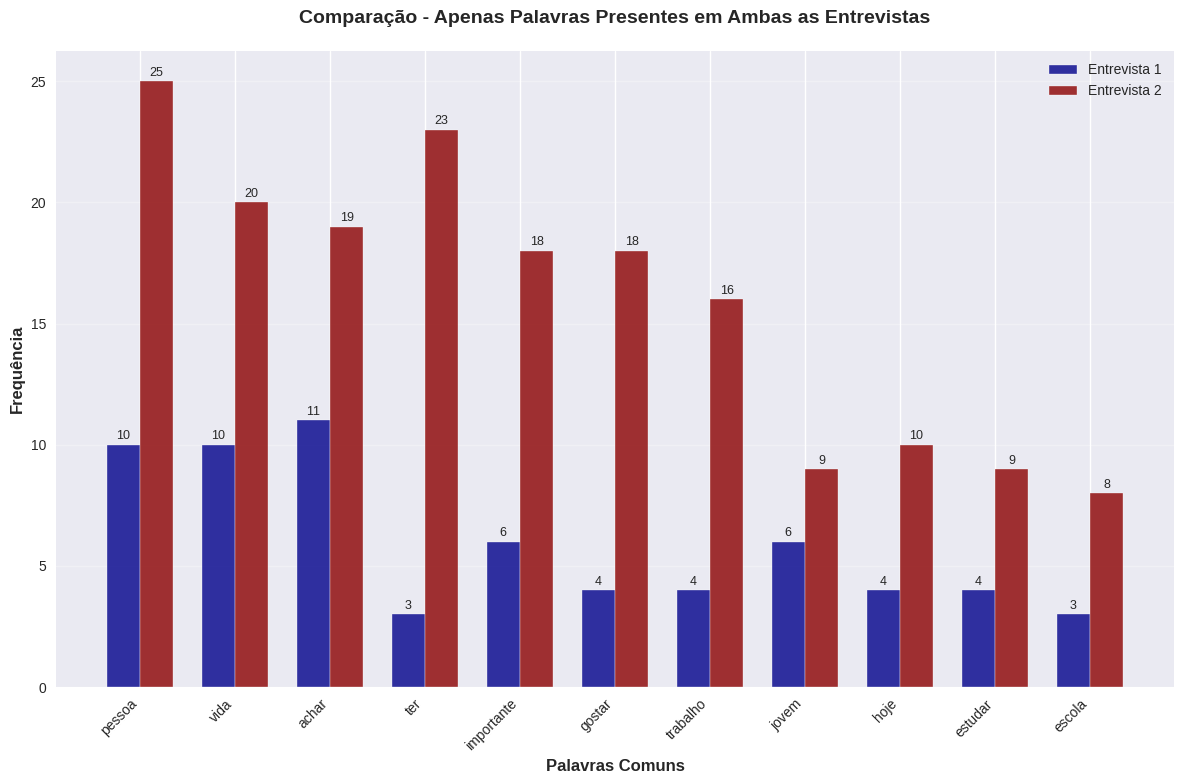

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dados das entrevistas
entrevista_1 = {
    'achar': 11, 'pessoa': 10, 'vida': 10, 'aprender': 8, 'jovem': 6, 'importante': 6,
    'família': 4, 'gostar': 4, 'objetivo': 4, 'tirar': 4, 'carta': 4, 'estudar': 4,
    'hoje': 4, 'trabalho': 4, 'escola': 3, 'bocadinho': 3, 'gostava': 3, 'marcante': 3,
    'acha': 3, 'ter': 3
}

entrevista_2 = {
    'pessoa': 25, 'ter': 23, 'vida': 20, 'achar': 19, 'gostar': 18, 'importante': 18,
    'trabalho': 16, 'viver': 16, 'haver': 15, 'gente': 14, 'ir': 12, 'pensar': 12,
    'muito': 12, 'falar': 12, 'coisa': 10, 'trabalhar': 10, 'hoje': 10, 'jovem': 9,
    'estudar': 9, 'escola': 8
}

# Obter todas as palavras únicas das duas entrevistas
todas_palavras = set(entrevista_1.keys()) | set(entrevista_2.keys())

# Criar DataFrame para facilitar a visualização
df_data = []
for palavra in todas_palavras:
    freq_1 = entrevista_1.get(palavra, 0)
    freq_2 = entrevista_2.get(palavra, 0)
    df_data.append({
        'palavra': palavra,
        'entrevista_1': freq_1,
        'entrevista_2': freq_2,
        'total': freq_1 + freq_2
    })

df = pd.DataFrame(df_data)
# Ordenar por frequência total (decrescente)
df = df.sort_values('total', ascending=False)

# Configurar o gráfico
plt.figure(figsize=(15, 10))

# Definir posições das barras
x = np.arange(len(df))
width = 0.35

# Criar as barras
bars1 = plt.bar(x - width/2, df['entrevista_1'], width,
                label='Entrevista 1', alpha=0.8, color='skyblue')
bars2 = plt.bar(x + width/2, df['entrevista_2'], width,
                label='Entrevista 2', alpha=0.8, color='lightcoral')

# Personalizar o gráfico
plt.xlabel('Palavras', fontsize=12, fontweight='bold')
plt.ylabel('Frequência', fontsize=12, fontweight='bold')
plt.title('Comparação de Frequência de Palavras - Entrevistas 1 e 2',
          fontsize=14, fontweight='bold', pad=20)
plt.xticks(x, df['palavra'], rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Adicionar valores nas barras
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    height1 = bar1.get_height()
    height2 = bar2.get_height()

    if height1 > 0:
        plt.text(bar1.get_x() + bar1.get_width()/2., height1 + 0.1,
                f'{int(height1)}', ha='center', va='bottom', fontsize=8)

    if height2 > 0:
        plt.text(bar2.get_x() + bar2.get_width()/2., height2 + 0.1,
                f'{int(height2)}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# Mostrar estatísticas básicas
print("=== ESTATÍSTICAS DAS ENTREVISTAS ===")
print(f"Entrevista 1: {len(entrevista_1)} palavras únicas")
print(f"Entrevista 2: {len(entrevista_2)} palavras únicas")
print(f"Total de palavras únicas: {len(todas_palavras)}")
print(f"Palavras em comum: {len(set(entrevista_1.keys()) & set(entrevista_2.keys()))}")

print("\n=== TOP 10 PALAVRAS MAIS FREQUENTES ===")
print(df.head(10)[['palavra', 'entrevista_1', 'entrevista_2', 'total']].to_string(index=False))

# Gráfico adicional: apenas palavras em comum
palavras_comuns = set(entrevista_1.keys()) & set(entrevista_2.keys())
if palavras_comuns:
    df_comuns = df[df['palavra'].isin(palavras_comuns)].copy()

    plt.figure(figsize=(12, 8))
    x_comuns = np.arange(len(df_comuns))

    bars1_comuns = plt.bar(x_comuns - width/2, df_comuns['entrevista_1'], width,
                          label='Entrevista 1', alpha=0.8, color='darkblue')
    bars2_comuns = plt.bar(x_comuns + width/2, df_comuns['entrevista_2'], width,
                          label='Entrevista 2', alpha=0.8, color='darkred')

    plt.xlabel('Palavras Comuns', fontsize=12, fontweight='bold')
    plt.ylabel('Frequência', fontsize=12, fontweight='bold')
    plt.title('Comparação - Apenas Palavras Presentes em Ambas as Entrevistas',
              fontsize=14, fontweight='bold', pad=20)
    plt.xticks(x_comuns, df_comuns['palavra'], rotation=45, ha='right')
    plt.legend()
    plt.grid(axis='y', alpha=0.3)

    # Adicionar valores nas barras
    for i, (bar1, bar2) in enumerate(zip(bars1_comuns, bars2_comuns)):
        height1 = bar1.get_height()
        height2 = bar2.get_height()

        plt.text(bar1.get_x() + bar1.get_width()/2., height1 + 0.1,
                f'{int(height1)}', ha='center', va='bottom', fontsize=9)
        plt.text(bar2.get_x() + bar2.get_width()/2., height2 + 0.1,
                f'{int(height2)}', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()


### Entidades

Entidades nomeadas são palavras ou expressões que se referem a coisas "conhecidas", como:

- PER (Pessoa): José Saramago
- LOC (Local/Localização): Portugal
- DATE (Data): 1992
- ORG (Organização): ONU

##### 1ª Tentativa

- Não consegue identificar as entidades corretamente
- Algumas estão certas e outras erradas

### Entrevista 1

In [ ]:
import spacy
import pandas as pd
import csv

# Carregar modelo de linguagem em português
nlp = spacy.load("pt_core_news_sm")

# Processar o texto
doc = nlp(Entrevista_dada)

# Extrair entidades
dados_entidades = []
for ent in doc.ents:
    dados_entidades.append({
        "Entidade": ent.text,
        "Tipo": ent.label_,
        "Início": ent.start_char,
        "Fim": ent.end_char
    })

# Criar DataFrame
df_entidades = pd.DataFrame(dados_entidades)

# Mostrar como tabela (no Jupyter, por exemplo)
print(df_entidades)

# Exportar para CSV
arquivo_csv = "entidades_extraidas.csv"
df_entidades.to_csv(arquivo_csv, index=False, encoding="utf-8")
print(f"\n✅ Arquivo CSV salvo como '{arquivo_csv}'")


       Entidade  Tipo  Início   Fim
0     Francisca   LOC      19    28
1       Eduarda  MISC      61    68
2         Nasci   PER      99   104
3     Guimarães   LOC     108   117
4     Guimarães   LOC    1895  1904
5      Bragança   PER    1926  1934
6      Ciências   LOC    2736  2744
7   Tecnologias   LOC    2747  2758
8      Economia  MISC    2789  2797
9        Gestão   LOC    2843  2849
10     Economia  MISC    2940  2948
11  Intermarché   LOC    3184  3195
12          Sim   PER    3424  3427
13        Claro   ORG    3972  3977
14      Aprendi   PER    4352  4359
15    Literacia   PER    4818  4827
16      Voltava   LOC    5145  5152
17      Gostava   LOC    5396  5403
18    Obrigada!  MISC    5536  5545

✅ Arquivo CSV salvo como 'entidades_extraidas.csv'


### Entrevista 2

In [ ]:
import spacy
import pandas as pd
import csv

# Carregar modelo de linguagem em português
nlp = spacy.load("pt_core_news_sm")

# Processar o texto
doc = nlp(Entrevista_tio)

# Extrair entidades
dados_entidades = []
for ent in doc.ents:
    dados_entidades.append({
        "Entidade": ent.text,
        "Tipo": ent.label_,
        "Início": ent.start_char,
        "Fim": ent.end_char
    })

# Criar DataFrame
df_entidades = pd.DataFrame(dados_entidades)

# Mostrar como tabela (no Jupyter, por exemplo)
print(df_entidades)

# Exportar para CSV
arquivo_csv = "entidades_extraidas.csv"
df_entidades.to_csv(arquivo_csv, index=False, encoding="utf-8")
print(f"\n✅ Arquivo CSV salvo como '{arquivo_csv}'")

                        Entidade  Tipo  Início    Fim
0                   José Morgado   PER      63     75
1                        Mariana   LOC      84     91
2   Hospital São Marcos de Braga   LOC     151    179
3            São João dos Soutos   LOC     194    213
4                    Professores  MISC     856    867
5                         Porquê   PER     967    973
6                         Honrar   LOC    2271   2277
7                            Fui   PER    3591   3594
8                        Oficial   LOC    3723   3730
9                        Salazar   PER    3786   3793
10                            Ai   PER    3884   3886
11                           Opa  MISC    4010   4013
12                     Freguesia   LOC    4618   4627
13                       Fardado   LOC    4629   4636
14                           Fui   PER    4870   4873
15                       Comecei   PER    5138   5145
16                           Sim   PER    5632   5635
17                      Perc

##### 2ª Tentativa

- Muito parecido a primeira tentativa
- Contém erros também
- Contém a descrição de cada entidade

### Entrevista 1

In [ ]:
# Importações
import spacy
import pandas as pd
from spacy import displacy
from IPython.display import display

# Processa o texto
doc = nlp(Entrevista_dada)

# Extrai todas as entidades do texto
entidades = []
for ent in doc.ents:
    descricao = spacy.explain(ent.label_)
    entidades.append({
        "Texto": ent.text,
        "Tipo (label_)": ent.label_,
        "Descrição": descricao if descricao else "–",
        "Início": ent.start_char,
        "Fim": ent.end_char
    })

# Cria DataFrame com resultados
df_entidades = pd.DataFrame(entidades)

# Mostra a tabela
print("🏷️ Entidades nomeadas encontradas:")
display(df_entidades)

# Visualização colorida (opcional)
displacy.render(doc, style="ent", jupyter=True)


🏷️ Entidades nomeadas encontradas:


,Texto,Tipo (label_),Descrição,Início,Fim
0,Francisca,LOC,"Non-GPE locations, mountain ranges, bodies of ...",19,28
1,Eduarda,MISC,"Miscellaneous entities, e.g. events, nationali...",61,68
2,Nasci,PER,Named person or family.,99,104
3,Guimarães,LOC,"Non-GPE locations, mountain ranges, bodies of ...",108,117
4,Guimarães,LOC,"Non-GPE locations, mountain ranges, bodies of ...",1895,1904
5,Bragança,PER,Named person or family.,1926,1934
6,Ciências,LOC,"Non-GPE locations, mountain ranges, bodies of ...",2736,2744
7,Tecnologias,LOC,"Non-GPE locations, mountain ranges, bodies of ...",2747,2758
8,Economia,MISC,"Miscellaneous entities, e.g. events, nationali...",2789,2797
9,Gestão,LOC,"Non-GPE locations, mountain ranges, bodies of ...",2843,2849


### Entrevista 2

In [ ]:

# Importações
import spacy
import pandas as pd
from spacy import displacy
from IPython.display import display

# Processa o texto
doc = nlp(Entrevista_tio)

# Extrai todas as entidades do texto
entidades = []
for ent in doc.ents:
    descricao = spacy.explain(ent.label_)
    entidades.append({
        "Texto": ent.text,
        "Tipo (label_)": ent.label_,
        "Descrição": descricao if descricao else "–",
        "Início": ent.start_char,
        "Fim": ent.end_char
    })

# Cria DataFrame com resultados
df_entidades = pd.DataFrame(entidades)

# Mostra a tabela
print("🏷️ Entidades nomeadas encontradas:")
display(df_entidades)

# Visualização colorida (opcional)
displacy.render(doc, style="ent", jupyter=True)


🏷️ Entidades nomeadas encontradas:


,Texto,Tipo (label_),Descrição,Início,Fim
0,José Morgado,PER,Named person or family.,63,75
1,Mariana,LOC,"Non-GPE locations, mountain ranges, bodies of ...",84,91
2,Hospital São Marcos de Braga,LOC,"Non-GPE locations, mountain ranges, bodies of ...",151,179
3,São João dos Soutos,LOC,"Non-GPE locations, mountain ranges, bodies of ...",194,213
4,Professores,MISC,"Miscellaneous entities, e.g. events, nationali...",856,867
5,Porquê,PER,Named person or family.,967,973
6,Honrar,LOC,"Non-GPE locations, mountain ranges, bodies of ...",2271,2277
7,Fui,PER,Named person or family.,3591,3594
8,Oficial,LOC,"Non-GPE locations, mountain ranges, bodies of ...",3723,3730
9,Salazar,PER,Named person or family.,3786,3793


##### 3ª Tentaiva
- Apenas encontra 15 entidades e também estão erradas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 50.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


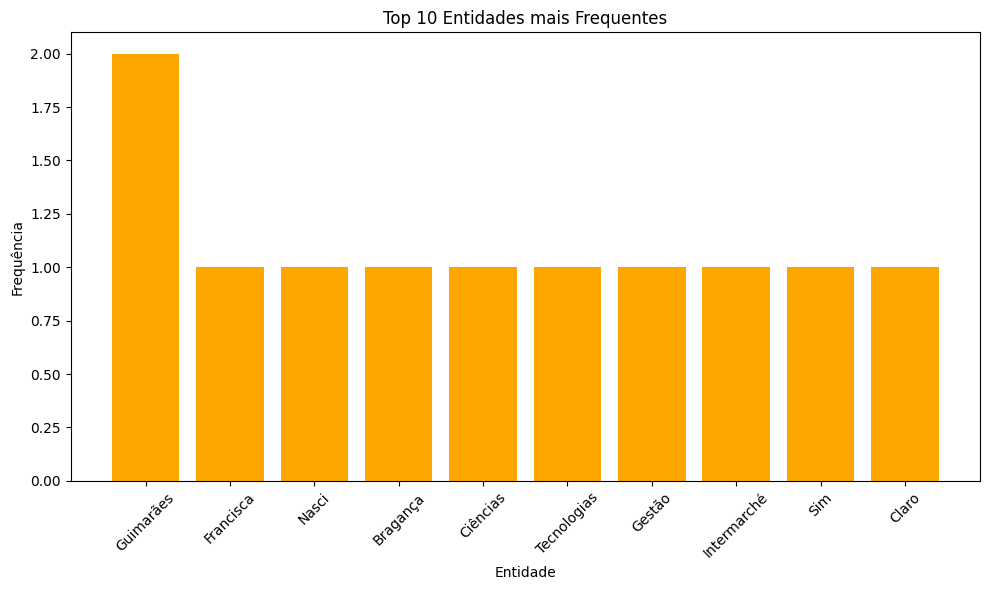

In [8]:
# Instalar e importar dependências
!python -m spacy download pt_core_news_sm

import spacy
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# Carregar modelo spaCy
nlp = spacy.load("pt_core_news_sm")

# Palavras que queremos excluir por erro frequente
palavras_excluir = {
    "Tarefa", "Difícil", "Campo", "Humildade", "Memórias", "tempestade", "Dávamo-nos", "Podiam"
}

# Tipos de entidade permitidos
tipos_validos = {"PER", "LOC", "ORG", "DATE", "GPE"}

# ✅ Carregar o texto diretamente do arquivo .txt
with open("Entrevista_dada.txt", "r", encoding="utf-8") as file:
    texto = file.read()

# ✅ Processar com spaCy
doc = nlp(texto)

# ✅ Extrair entidades filtradas
entidades_filtradas = [
    (ent.text.strip(), ent.label_)
    for ent in doc.ents
    if ent.label_ in tipos_validos
    and ent.text.strip() not in palavras_excluir
    and ent.text.strip()[0].isupper()
]

# ✅ Contar frequência
frequencias = Counter(entidades_filtradas)

# ✅ Converter para DataFrame
df_entidades = pd.DataFrame(
    [(texto, tipo, freq) for (texto, tipo), freq in frequencias.items()],
    columns=["Entidade", "Tipo", "Frequência"]
).sort_values(by="Frequência", ascending=False)

# ✅ Guardar como CSV
df_entidades.to_csv("entidades_frequencia.csv", index=False)

# ✅ Gráfico Top 10 Entidades
top_10 = df_entidades.head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10["Entidade"], top_10["Frequência"], color="orange")
plt.title("Top 10 Entidades mais Frequentes")
plt.xlabel("Entidade")
plt.ylabel("Frequência")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("entidades_top10.png")
plt.show()


### Alternativa às Entidades -> Classe Gramatical

Classes Gramaticais usadas:

1. **Nome comum (NOUN)**: Palavra que designa coisas, pessoas, animais, lugares ou ideias de forma geral (não específica).

2.  **Nome próprio (PROPN)**: Palavra que nomeia algo específico, como um nome de pessoa, país, empresa, etc. Começa com letra maiúscula.

3. **Verbo (VERB)**: Palavra que indica ação, estado ou ocorrência

4. **Adjetivo (ADJ)**: Palavra que qualifica ou caracteriza um nome

5.  **Advérbio (ADV)**: Palavra que modifica um verbo, um adjetivo ou outro advérbio, indicando modo, tempo, intensidade, etc

6. **Preposição (ADP)**: Palavra que liga palavras/frases, indicando relações (de lugar, tempo, causa...)


- O código separa as palavras e atribuí-lhe uma classe gramaticas. Guarda também os resultados em ficheiro csv


### Entrevista 1

In [15]:
# Importações
import spacy
import pandas as pd
from IPython.display import display

# Carregar modelo (certifique-se de que 'pt_core_news_sm' está instalado)
nlp = spacy.load("pt_core_news_sm")

# Processa o texto
doc = nlp(Entrevista_dada)

# Categorias de interesse
categorias_desejadas = {
    "NOUN": "Nome comum",
    "PROPN": "Nome próprio",
    "VERB": "Verbo",
    "ADJ": "Adjetivo",
    "ADV": "Advérbio",
    "ADP": "Preposição"
}

# Extrair e classificar os tokens
tokens_filtrados = [
    {
        "Texto": token.text,
        "Classe Gramatical": categorias_desejadas[token.pos_],
        "Lemma": token.lemma_,
        "Posição (início)": token.idx
    }
    for token in doc
    if token.pos_ in categorias_desejadas
]

# Criar DataFrame
df_tokens = pd.DataFrame(tokens_filtrados)

# Adicionar coluna de frequência de ocorrência da palavra
df_tokens["Frequência"] = df_tokens.groupby("Texto")["Texto"].transform("count")

# Mostrar tabela com os resultados
print("🔍 Palavras identificadas por categoria gramatical:")
display(df_tokens)

# Contagem por classe gramatical
contagem = df_tokens["Classe Gramatical"].value_counts().reset_index()
contagem.columns = ["Classe Gramatical", "Quantidade"]

# Mostrar contagem
print("\n📊 Contagem por categoria gramatical:")
display(contagem)

# 💾 Salvar os resultados em arquivos CSV
df_tokens.to_csv("palavras_com_classe_gramatical.csv", index=False, encoding="utf-8")


🔍 Palavras identificadas por categoria gramatical:


,Texto,Classe Gramatical,Lemma,Posição (início),Frequência
0,﻿Olá,Nome próprio,﻿Olá,0,1
1,nome,Nome comum,nome,12,1
2,Francisca,Nome comum,francisca,19,1
3,entrevistar,Verbo,entrevistar,35,1
4,irmã,Nome comum,irmã,55,1
...,...,...,...,...,...
580,sempre,Advérbio,sempre,5471,5
581,disponível,Adjetivo,disponível,5478,1
582,ajudar,Verbo,ajudar,5494,1
583,no,Preposição,em o,5502,12



📊 Contagem por categoria gramatical:


,Classe Gramatical,Quantidade
0,Nome comum,169
1,Verbo,148
2,Preposição,103
3,Advérbio,93
4,Adjetivo,58
5,Nome próprio,14


### Entrevista 2

In [16]:
# Importações
import spacy
import pandas as pd
from IPython.display import display

# Carregar modelo (certifique-se de que 'pt_core_news_sm' está instalado)
nlp = spacy.load("pt_core_news_sm")

# Processa o texto
doc = nlp(Entrevista_tio)

# Categorias de interesse
categorias_desejadas = {
    "NOUN": "Nome comum",
    "PROPN": "Nome próprio",
    "VERB": "Verbo",
    "ADJ": "Adjetivo",
    "ADV": "Advérbio",
    "ADP": "Preposição"
}

# Extrair e classificar os tokens
tokens_filtrados = [
    {
        "Texto": token.text,
        "Classe Gramatical": categorias_desejadas[token.pos_],
        "Lemma": token.lemma_,
        "Posição (início)": token.idx
    }
    for token in doc
    if token.pos_ in categorias_desejadas
]

# Criar DataFrame
df_tokens = pd.DataFrame(tokens_filtrados)

# Adicionar coluna de frequência de ocorrência da palavra
df_tokens["Frequência"] = df_tokens.groupby("Texto")["Texto"].transform("count")

# Mostrar tabela com os resultados
print("🔍 Palavras identificadas por categoria gramatical:")
display(df_tokens)

# Contagem por classe gramatical
contagem = df_tokens["Classe Gramatical"].value_counts().reset_index()
contagem.columns = ["Classe Gramatical", "Quantidade"]

# Mostrar contagem
print("\n📊 Contagem por categoria gramatical:")
display(contagem)

# 💾 Salvar os resultados em arquivos CSV
df_tokens.to_csv("palavras_com_classe_gramatical.csv", index=False, encoding="utf-8")




🔍 Palavras identificadas por categoria gramatical:


,Texto,Classe Gramatical,Lemma,Posição (início),Frequência
0,﻿Boa,Adjetivo,﻿Boa,0,1
1,noite,Nome comum,noite,5,1
2,então,Advérbio,então,12,3
3,aqui,Advérbio,aqui,28,4
4,com,Preposição,com,33,16
...,...,...,...,...,...
1659,questão,Nome comum,questão,15564,5
1660,Pronto,Nome comum,pronto,15575,1
1661,Obrigada,Nome comum,obrigado,15594,1
1662,pela,Preposição,por o,15603,1



📊 Contagem por categoria gramatical:


,Classe Gramatical,Quantidade
0,Verbo,476
1,Nome comum,424
2,Advérbio,357
3,Preposição,240
4,Adjetivo,139
5,Nome próprio,28


#### Comparação em Gráfico

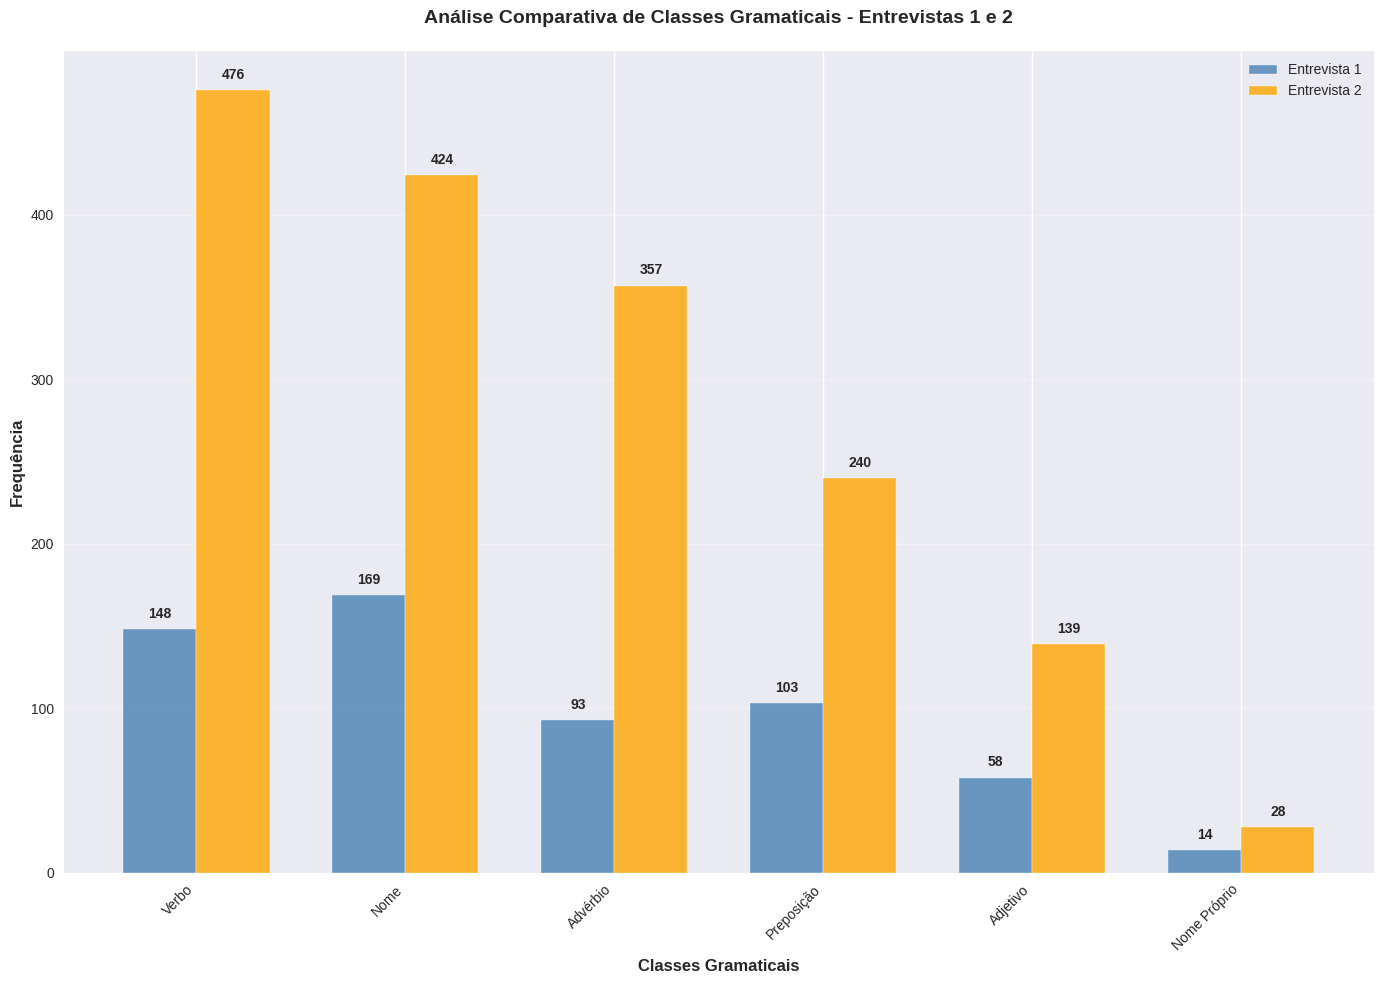

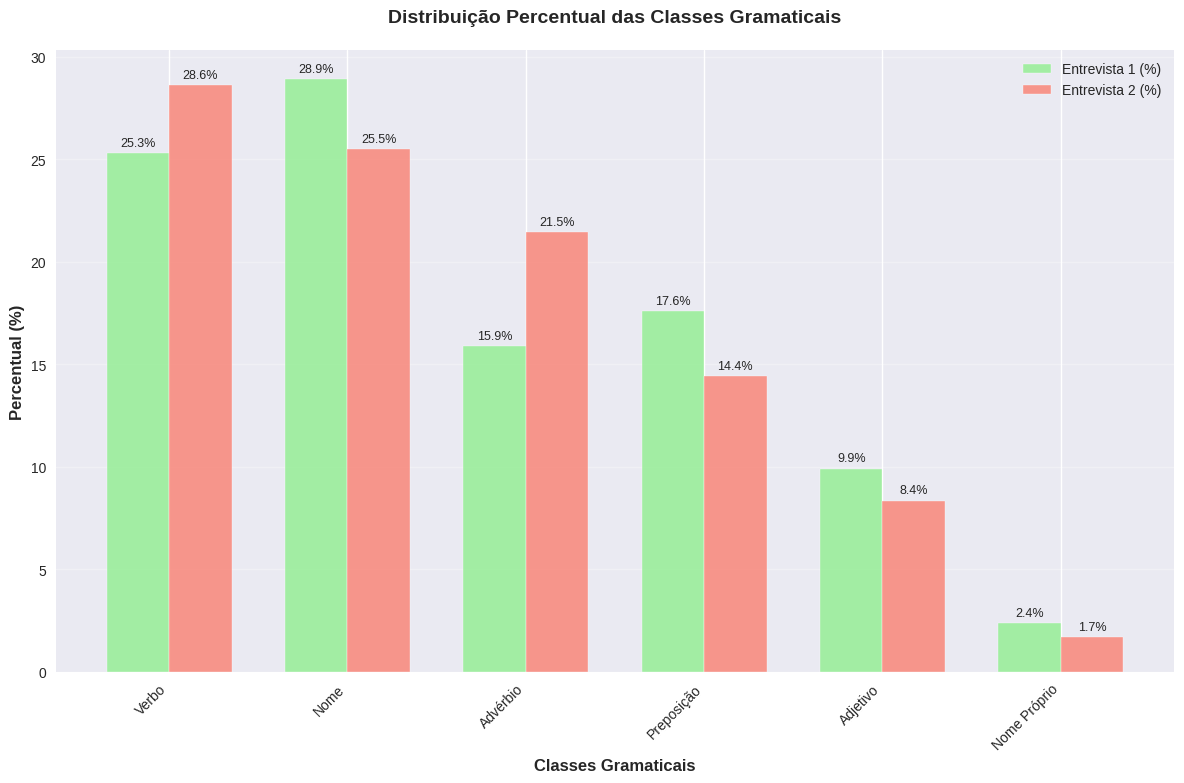

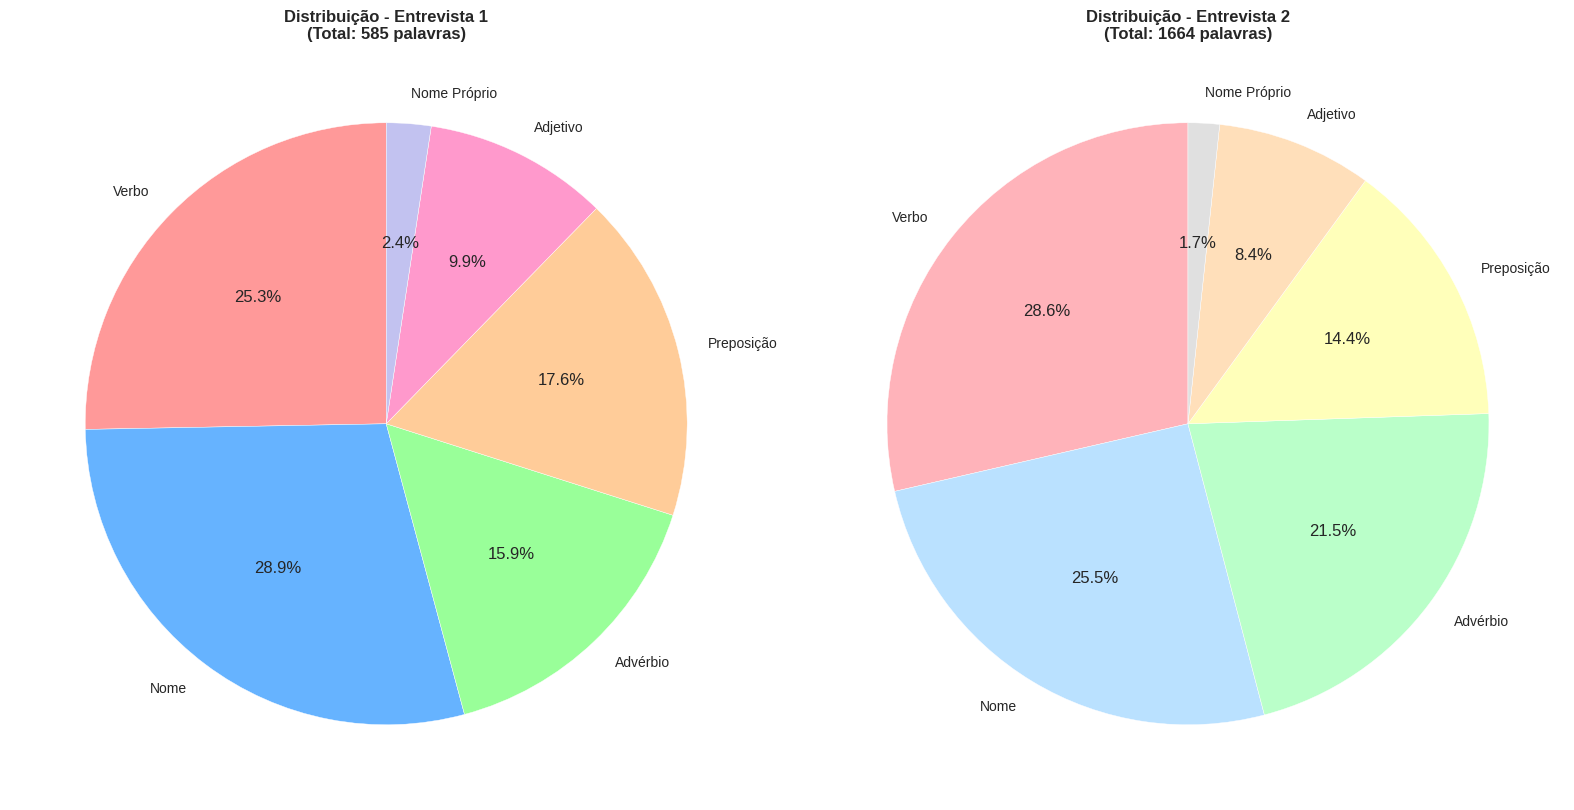

=== ANÁLISE ESTATÍSTICA DAS CLASSES GRAMATICAIS ===
Total de palavras - Entrevista 1: 585
Total de palavras - Entrevista 2: 1664
Diferença total: 1079 palavras (184.4% de aumento)

=== FREQUÊNCIAS E PERCENTUAIS POR CLASSE ===
Classe Gramatical  Entrevista 1  Entrevista 2  Diferença  % Entrevista 1  % Entrevista 2
            Verbo           148           476        328            25.3            28.6
             Nome           169           424        255            28.9            25.5
         Advérbio            93           357        264            15.9            21.5
       Preposição           103           240        137            17.6            14.4
         Adjetivo            58           139         81             9.9             8.4
     Nome Próprio            14            28         14             2.4             1.7

=== RANKING POR FREQUÊNCIA ===
Entrevista 1:
2º Verbo: 148 (25.3%)
1º Nome: 169 (28.9%)
4º Advérbio: 93 (15.9%)
3º Preposição: 103 (17.6%)
5º Adjetivo

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dados das classes gramaticais
entrevista_1 = {
    'Nome': 169,
    'Verbo': 148,
    'Preposição': 103,
    'Advérbio': 93,
    'Adjetivo': 58,
    'Nome Próprio': 14
}

entrevista_2 = {
    'Verbo': 476,
    'Nome': 424,
    'Advérbio': 357,
    'Preposição': 240,
    'Adjetivo': 139,
    'Nome Próprio': 28
}

# Criar DataFrame para facilitar a visualização
df_data = []
for classe in entrevista_1.keys():
    freq_1 = entrevista_1[classe]
    freq_2 = entrevista_2[classe]
    df_data.append({
        'classe_gramatical': classe,
        'entrevista_1': freq_1,
        'entrevista_2': freq_2,
        'total': freq_1 + freq_2,
        'diferenca': freq_2 - freq_1
    })

df = pd.DataFrame(df_data)
# Ordenar por frequência da entrevista 2 (decrescente)
df = df.sort_values('entrevista_2', ascending=False)

# Configurar o gráfico principal
plt.figure(figsize=(14, 10))

# Definir posições das barras
x = np.arange(len(df))
width = 0.35

# Criar as barras
bars1 = plt.bar(x - width/2, df['entrevista_1'], width,
                label='Entrevista 1', alpha=0.8, color='steelblue')
bars2 = plt.bar(x + width/2, df['entrevista_2'], width,
                label='Entrevista 2', alpha=0.8, color='orange')

# Personalizar o gráfico
plt.xlabel('Classes Gramaticais', fontsize=12, fontweight='bold')
plt.ylabel('Frequência', fontsize=12, fontweight='bold')
plt.title('Análise Comparativa de Classes Gramaticais - Entrevistas 1 e 2',
          fontsize=14, fontweight='bold', pad=20)
plt.xticks(x, df['classe_gramatical'], rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Adicionar valores nas barras
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    height1 = bar1.get_height()
    height2 = bar2.get_height()

    plt.text(bar1.get_x() + bar1.get_width()/2., height1 + 5,
            f'{int(height1)}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    plt.text(bar2.get_x() + bar2.get_width()/2., height2 + 5,
            f'{int(height2)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Gráfico de percentuais
plt.figure(figsize=(12, 8))

# Calcular percentuais
total_1 = sum(entrevista_1.values())
total_2 = sum(entrevista_2.values())

df['perc_entrevista_1'] = (df['entrevista_1'] / total_1) * 100
df['perc_entrevista_2'] = (df['entrevista_2'] / total_2) * 100

# Criar gráfico de percentuais
bars1_perc = plt.bar(x - width/2, df['perc_entrevista_1'], width,
                     label='Entrevista 1 (%)', alpha=0.8, color='lightgreen')
bars2_perc = plt.bar(x + width/2, df['perc_entrevista_2'], width,
                     label='Entrevista 2 (%)', alpha=0.8, color='salmon')

plt.xlabel('Classes Gramaticais', fontsize=12, fontweight='bold')
plt.ylabel('Percentual (%)', fontsize=12, fontweight='bold')
plt.title('Distribuição Percentual das Classes Gramaticais',
          fontsize=14, fontweight='bold', pad=20)
plt.xticks(x, df['classe_gramatical'], rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Adicionar valores percentuais nas barras
for i, (bar1, bar2) in enumerate(zip(bars1_perc, bars2_perc)):
    height1 = bar1.get_height()
    height2 = bar2.get_height()

    plt.text(bar1.get_x() + bar1.get_width()/2., height1 + 0.2,
            f'{height1:.1f}%', ha='center', va='bottom', fontsize=9)
    plt.text(bar2.get_x() + bar2.get_width()/2., height2 + 0.2,
            f'{height2:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Gráfico de pizza para cada entrevista
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Pizza Entrevista 1
colors1 = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc', '#c2c2f0']
wedges1, texts1, autotexts1 = ax1.pie(df['entrevista_1'], labels=df['classe_gramatical'],
                                       autopct='%1.1f%%', startangle=90, colors=colors1)
ax1.set_title('Distribuição - Entrevista 1\n(Total: {} palavras)'.format(total_1),
              fontsize=12, fontweight='bold')

# Pizza Entrevista 2
colors2 = ['#ffb3ba', '#bae1ff', '#baffc9', '#ffffba', '#ffdfba', '#e0e0e0']
wedges2, texts2, autotexts2 = ax2.pie(df['entrevista_2'], labels=df['classe_gramatical'],
                                       autopct='%1.1f%%', startangle=90, colors=colors2)
ax2.set_title('Distribuição - Entrevista 2\n(Total: {} palavras)'.format(total_2),
              fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Mostrar estatísticas detalhadas
print("=== ANÁLISE ESTATÍSTICA DAS CLASSES GRAMATICAIS ===")
print(f"Total de palavras - Entrevista 1: {total_1}")
print(f"Total de palavras - Entrevista 2: {total_2}")
print(f"Diferença total: {total_2 - total_1} palavras ({((total_2/total_1)-1)*100:.1f}% de aumento)")

print("\n=== FREQUÊNCIAS E PERCENTUAIS POR CLASSE ===")
resultado = df[['classe_gramatical', 'entrevista_1', 'entrevista_2', 'diferenca',
                'perc_entrevista_1', 'perc_entrevista_2']].copy()
resultado.columns = ['Classe Gramatical', 'Entrevista 1', 'Entrevista 2',
                    'Diferença', '% Entrevista 1', '% Entrevista 2']
print(resultado.to_string(index=False, float_format='%.1f'))

print("\n=== RANKING POR FREQUÊNCIA ===")
print("Entrevista 1:")
for i, row in df.iterrows():
    print(f"{i+1}º {row['classe_gramatical']}: {row['entrevista_1']} ({row['perc_entrevista_1']:.1f}%)")

print("\nEntrevista 2:")
for i, row in df.iterrows():
    print(f"{i+1}º {row['classe_gramatical']}: {row['entrevista_2']} ({row['perc_entrevista_2']:.1f}%)")

print("\n=== OBSERVAÇÕES ===")
max_crescimento = df.loc[df['diferenca'].idxmax()]
print(f"Maior crescimento absoluto: {max_crescimento['classe_gramatical']} (+{max_crescimento['diferenca']} palavras)")

df['crescimento_perc'] = ((df['entrevista_2'] / df['entrevista_1']) - 1) * 100
max_crescimento_perc = df.loc[df['crescimento_perc'].idxmax()]
print(f"Maior crescimento percentual: {max_crescimento_perc['classe_gramatical']} (+{max_crescimento_perc['crescimento_perc']:.1f}%)")

classe_dominante_1 = df.loc[df['entrevista_1'].idxmax()]['classe_gramatical']
classe_dominante_2 = df.loc[df['entrevista_2'].idxmax()]['classe_gramatical']
print(f"Classe mais frequente - Entrevista 1: {classe_dominante_1}")
print(f"Classe mais frequente - Entrevista 2: {classe_dominante_2}")

## Total de Palavras

### Entrevista 1

- Com stopwords

In [ ]:
# Processar o texto
doc = nlp(Entrevista_dada)

# Contar todas as palavras (tokens alfabéticos)
palavras = [token.text for token in doc if token.is_alpha]
total_palavras = len(palavras)

print(f"🔢 Total de palavras (com stopwords): {total_palavras}")

🔢 Total de palavras (com stopwords): 957


- Sem stopwords

In [ ]:
# Contar palavras excluindo stopwords
palavras_sem_stopwords = [
    token.text for token in doc if token.is_alpha and not token.is_stop
]
total_sem_stopwords = len(palavras_sem_stopwords)

print(f"🔢 Total de palavras (sem stopwords): {total_sem_stopwords}")


🔢 Total de palavras (sem stopwords): 337


#### Gráfico

<ipython-input-53-fcee68f33a71>:29: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.



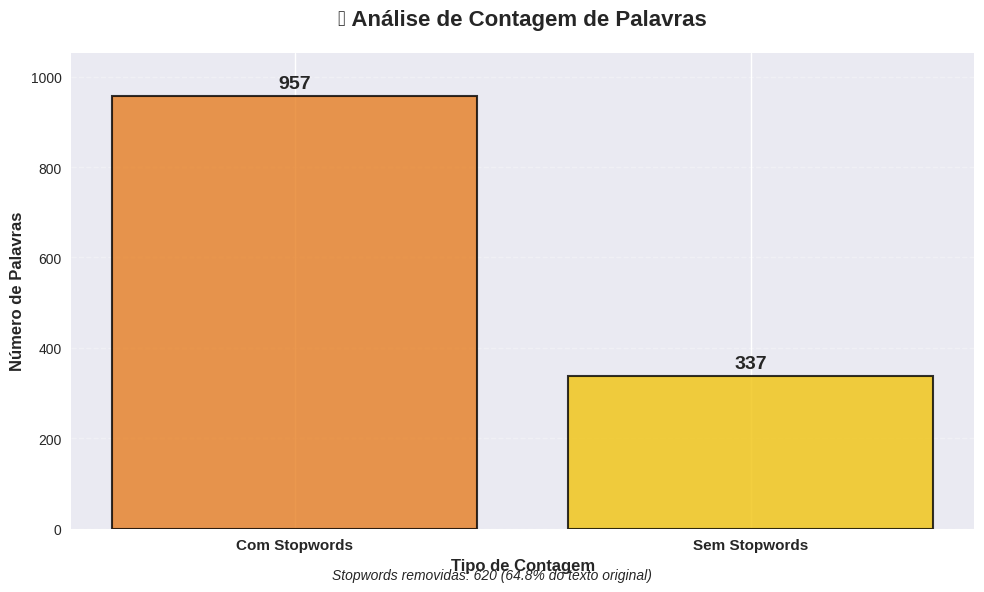

📈 ESTATÍSTICAS DA ANÁLISE DE TEXTO
Total de palavras (com stopwords): 957
Total de palavras (sem stopwords): 337
Stopwords removidas: 620
Percentual de stopwords: 64.8%
Redução do texto: 64.8%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
categorias = ['Com Stopwords', 'Sem Stopwords']
valores = [957, 337]
cores = ['#e67e22', '#f1c40f']  # Laranja e Amarelo

# Configurar o gráfico
plt.figure(figsize=(10, 6))
bars = plt.bar(categorias, valores, color=cores, alpha=0.8, edgecolor='black', linewidth=1.5)

# Personalizar o gráfico
plt.title('📊 Análise de Contagem de Palavras', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Número de Palavras', fontsize=12, fontweight='bold')
plt.xlabel('Tipo de Contagem', fontsize=12, fontweight='bold')

# Adicionar valores nas barras
for bar, valor in zip(bars, valores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'{valor}', ha='center', va='bottom', fontsize=14, fontweight='bold')

# Configurar grade e estilo
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ylim(0, max(valores) * 1.1)

# Melhorar aparência
plt.tight_layout()
plt.xticks(fontsize=11, fontweight='bold')
plt.yticks(fontsize=10)

# Adicionar informações extras
total_stopwords = valores[0] - valores[1]
percentual_stopwords = (total_stopwords / valores[0]) * 100

plt.figtext(0.5, 0.02, f'Stopwords removidas: {total_stopwords} ({percentual_stopwords:.1f}% do texto original)',
           ha='center', fontsize=10, style='italic')

# Mostrar o gráfico
plt.show()

# Exibir estatísticas
print("="*50)
print("📈 ESTATÍSTICAS DA ANÁLISE DE TEXTO")
print("="*50)
print(f"Total de palavras (com stopwords): {valores[0]}")
print(f"Total de palavras (sem stopwords): {valores[1]}")
print(f"Stopwords removidas: {total_stopwords}")
print(f"Percentual de stopwords: {percentual_stopwords:.1f}%")
print(f"Redução do texto: {((total_stopwords/valores[0])*100):.1f}%")
print("="*50)

### Entrevista 2

In [ ]:
# Processar o texto
doc = nlp(Entrevista_tio)

# Contar todas as palavras (tokens alfabéticos)
palavras = [token.text for token in doc if token.is_alpha]
total_palavras = len(palavras)

print(f"🔢 Total de palavras (com stopwords): {total_palavras}")


🔢 Total de palavras (com stopwords): 2728


In [ ]:
# Contar palavras excluindo stopwords
palavras_sem_stopwords = [
    token.text for token in doc if token.is_alpha and not token.is_stop
]
total_sem_stopwords = len(palavras_sem_stopwords)

print(f"🔢 Total de palavras (sem stopwords): {total_sem_stopwords}")


🔢 Total de palavras (sem stopwords): 925


<ipython-input-54-da5e955518ef>:29: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.



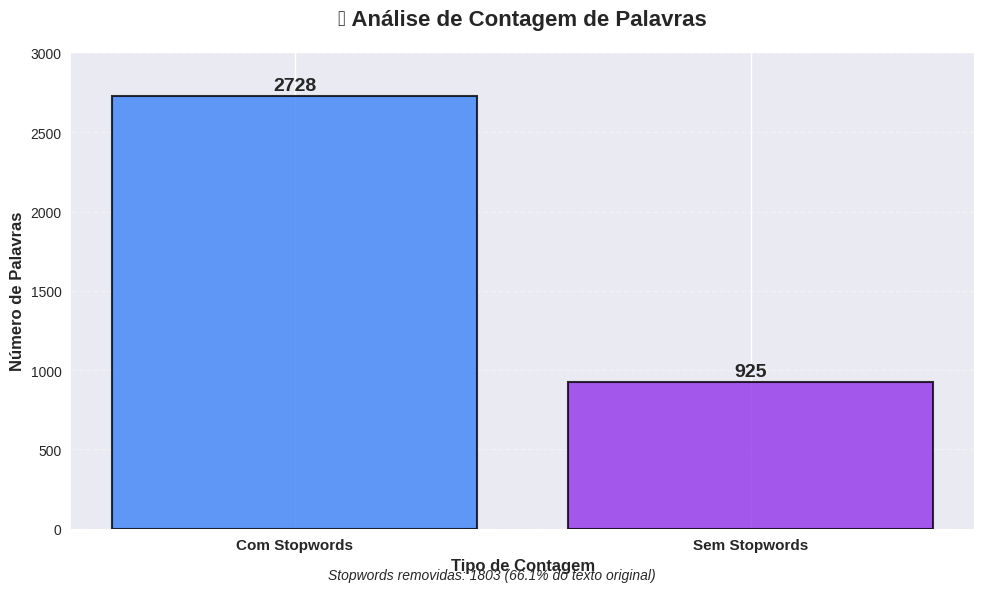

📈 ESTATÍSTICAS DA ANÁLISE DE TEXTO
Total de palavras (com stopwords): 2728
Total de palavras (sem stopwords): 925
Stopwords removidas: 1803
Percentual de stopwords: 66.1%
Redução do texto: 66.1%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
categorias = ['Com Stopwords', 'Sem Stopwords']
valores = [2728, 925]
cores = ['#3B82F6', '#9333EA']  # Roxo e Azul

# Configurar o gráfico
plt.figure(figsize=(10, 6))
bars = plt.bar(categorias, valores, color=cores, alpha=0.8, edgecolor='black', linewidth=1.5)

# Personalizar o gráfico
plt.title('📊 Análise de Contagem de Palavras', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Número de Palavras', fontsize=12, fontweight='bold')
plt.xlabel('Tipo de Contagem', fontsize=12, fontweight='bold')

# Adicionar valores nas barras
for bar, valor in zip(bars, valores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'{valor}', ha='center', va='bottom', fontsize=14, fontweight='bold')

# Configurar grade e estilo
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ylim(0, max(valores) * 1.1)

# Melhorar aparência
plt.tight_layout()
plt.xticks(fontsize=11, fontweight='bold')
plt.yticks(fontsize=10)

# Adicionar informações extras
total_stopwords = valores[0] - valores[1]
percentual_stopwords = (total_stopwords / valores[0]) * 100

plt.figtext(0.5, 0.02, f'Stopwords removidas: {total_stopwords} ({percentual_stopwords:.1f}% do texto original)',
           ha='center', fontsize=10, style='italic')

# Mostrar o gráfico
plt.show()

# Exibir estatísticas
print("="*50)
print("📈 ESTATÍSTICAS DA ANÁLISE DE TEXTO")
print("="*50)
print(f"Total de palavras (com stopwords): {valores[0]}")
print(f"Total de palavras (sem stopwords): {valores[1]}")
print(f"Stopwords removidas: {total_stopwords}")
print(f"Percentual de stopwords: {percentual_stopwords:.1f}%")
print(f"Redução do texto: {((total_stopwords/valores[0])*100):.1f}%")
print("="*50)

#### Comparação em gráfico

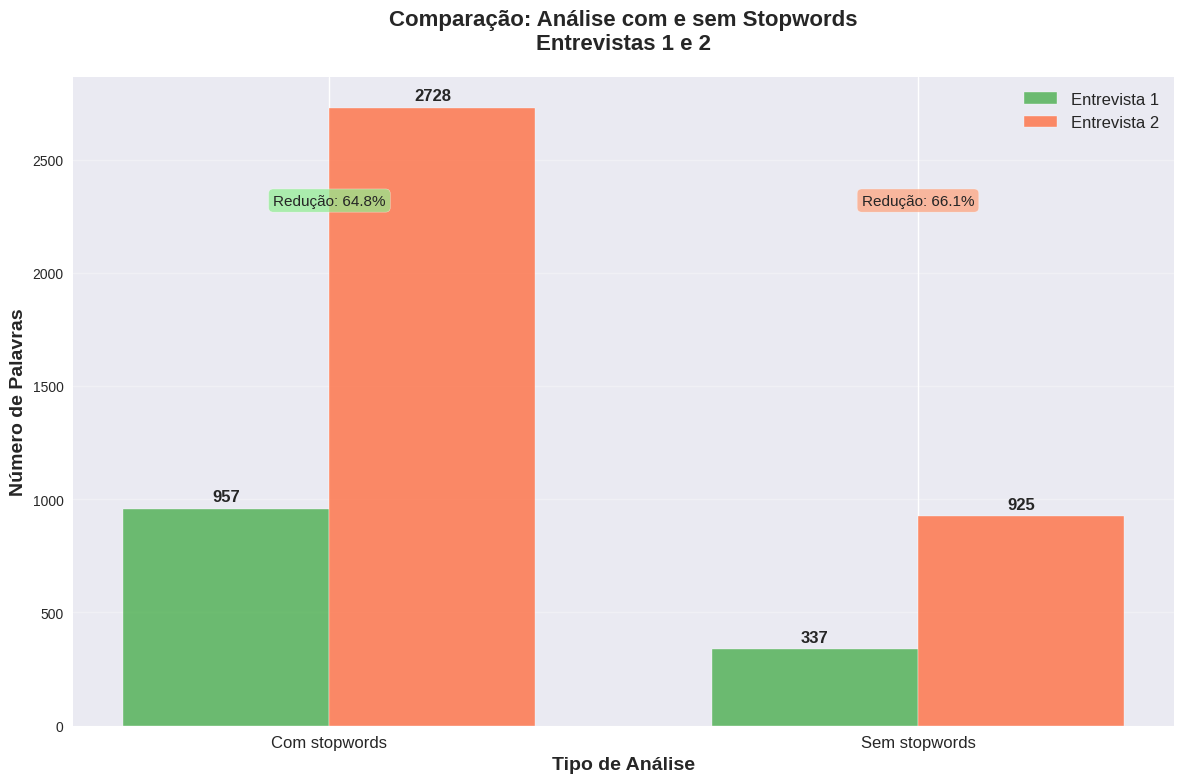

=== ANÁLISE DE STOPWORDS ===
Entrevista 1:
  Com stopwords: 957 palavras
  Sem stopwords: 337 palavras
  Redução: 64.8% (620 palavras removidas)

Entrevista 2:
  Com stopwords: 2728 palavras
  Sem stopwords: 925 palavras
  Redução: 66.1% (1803 palavras removidas)

Comparação entre entrevistas:
  Proporção total (com stopwords): Entrevista 2 é 2.9x maior
  Proporção total (sem stopwords): Entrevista 2 é 2.7x maior


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dados das entrevistas
entrevista_1 = {'Com stopwords': 957, 'Sem stopwords': 337}
entrevista_2 = {'Com stopwords': 2728, 'Sem stopwords': 925}

# Preparar dados para o gráfico
categorias = ['Com stopwords', 'Sem stopwords']
valores_ent1 = [entrevista_1['Com stopwords'], entrevista_1['Sem stopwords']]
valores_ent2 = [entrevista_2['Com stopwords'], entrevista_2['Sem stopwords']]

# Configurar o gráfico
plt.figure(figsize=(12, 8))

# Definir posições das barras
x = np.arange(len(categorias))
width = 0.35

# Criar as barras
bars1 = plt.bar(x - width/2, valores_ent1, width,
                label='Entrevista 1', alpha=0.8, color='#4CAF50')
bars2 = plt.bar(x + width/2, valores_ent2, width,
                label='Entrevista 2', alpha=0.8, color='#FF7043')

# Personalizar o gráfico
plt.xlabel('Tipo de Análise', fontsize=14, fontweight='bold')
plt.ylabel('Número de Palavras', fontsize=14, fontweight='bold')
plt.title('Comparação: Análise com e sem Stopwords\nEntrevistas 1 e 2',
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(x, categorias, fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Adicionar valores nas barras
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    height1 = bar1.get_height()
    height2 = bar2.get_height()

    plt.text(bar1.get_x() + bar1.get_width()/2., height1 + 20,
            f'{int(height1)}', ha='center', va='bottom',
            fontsize=12, fontweight='bold')
    plt.text(bar2.get_x() + bar2.get_width()/2., height2 + 20,
            f'{int(height2)}', ha='center', va='bottom',
            fontsize=12, fontweight='bold')

# Calcular e mostrar percentuais de redução
reducao_ent1 = ((entrevista_1['Com stopwords'] - entrevista_1['Sem stopwords']) / entrevista_1['Com stopwords']) * 100
reducao_ent2 = ((entrevista_2['Com stopwords'] - entrevista_2['Sem stopwords']) / entrevista_2['Com stopwords']) * 100

plt.text(0, max(valores_ent1 + valores_ent2) * 0.85,
         f'Redução: {reducao_ent1:.1f}%',
         ha='center', va='center', fontsize=11,
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen', alpha=0.7))

plt.text(1, max(valores_ent1 + valores_ent2) * 0.85,
         f'Redução: {reducao_ent2:.1f}%',
         ha='center', va='center', fontsize=11,
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightsalmon', alpha=0.7))

plt.tight_layout()
plt.show()

# Mostrar estatísticas
print("=== ANÁLISE DE STOPWORDS ===")
print(f"Entrevista 1:")
print(f"  Com stopwords: {entrevista_1['Com stopwords']} palavras")
print(f"  Sem stopwords: {entrevista_1['Sem stopwords']} palavras")
print(f"  Redução: {reducao_ent1:.1f}% ({entrevista_1['Com stopwords'] - entrevista_1['Sem stopwords']} palavras removidas)")

print(f"\nEntrevista 2:")
print(f"  Com stopwords: {entrevista_2['Com stopwords']} palavras")
print(f"  Sem stopwords: {entrevista_2['Sem stopwords']} palavras")
print(f"  Redução: {reducao_ent2:.1f}% ({entrevista_2['Com stopwords'] - entrevista_2['Sem stopwords']} palavras removidas)")

print(f"\nComparação entre entrevistas:")
print(f"  Proporção total (com stopwords): Entrevista 2 é {entrevista_2['Com stopwords']/entrevista_1['Com stopwords']:.1f}x maior")
print(f"  Proporção total (sem stopwords): Entrevista 2 é {entrevista_2['Sem stopwords']/entrevista_1['Sem stopwords']:.1f}x maior")

## Top 10 palavras mais frequentes

### Entrevista 1

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
import pandas as pd

# Seu código original
from collections import Counter

doc = nlp(Entrevista_dada)

palavras = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and token.is_alpha
]

frequencia = Counter(palavras)

print("🔝 Top 10 palavras mais frequentes:")
for palavra, freq in frequencia.most_common(10):
    print(f"{palavra}: {freq}")

# 📊 CRIANDO O GRÁFICO INTERATIVO
# Preparar dados para visualização
top_10 = frequencia.most_common(10)
palavras_top = [palavra for palavra, freq in top_10]
frequencias_top = [freq for palavra, freq in top_10]

# Criar DataFrame
df = pd.DataFrame({
    'palavra': palavras_top,
    'frequencia': frequencias_top,
    'rank': range(1, len(palavras_top) + 1)
})

# Reverter ordem para mostrar a palavra mais frequente no topo
df = df[::-1].reset_index(drop=True)

# 🎨 Gráfico de barras horizontal interativo
fig = go.Figure()

# Adicionar barras com gradiente de cores
colors = px.colors.sequential.Viridis_r[:len(df)]

fig.add_trace(go.Bar(
    y=df['palavra'],
    x=df['frequencia'],
    orientation='h',
    marker=dict(
        color=df['frequencia'],
        colorscale='Viridis',
        colorbar=dict(title="Frequência"),
        line=dict(color='rgba(58, 71, 80, 0.6)', width=1)
    ),
    text=df['frequencia'],
    textposition='outside',
    hovertemplate='<b>%{y}</b><br>' +
                  'Frequência: %{x}<br>' +
                  'Posição: %{customdata}º<extra></extra>',
    customdata=df['rank']
))

# Personalizar layout
fig.update_layout(
    title={
        'text': '📊 Top 10 Palavras Mais Frequentes',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20, 'color': '#2E4057'}
    },
    xaxis_title='Frequência',
    yaxis_title='Palavras',
    font=dict(size=12),
    height=600,
    width=900,
    plot_bgcolor='white',
    paper_bgcolor='white',
    margin=dict(l=120, r=100, t=80, b=50),
    hoverlabel=dict(
        bgcolor="white",
        font_size=14,
        font_family="Arial"
    )
)

# Estilizar eixos
fig.update_xaxes(
    showgrid=True,
    gridcolor='lightgray',
    gridwidth=1,
    showline=True,
    linecolor='gray'
)

fig.update_yaxes(
    showgrid=False,
    showline=True,
    linecolor='gray'
)

# Mostrar gráfico
fig.show()

# 📊 ESTATÍSTICAS RESUMIDAS
print("\n" + "="*50)
print("📈 ESTATÍSTICAS GERAIS")
print("="*50)

total_palavras_unicas = len(frequencia)
total_ocorrencias = sum(frequencia.values())
palavra_mais_freq = frequencia.most_common(1)[0]
palavra_menos_freq = frequencia.most_common()[-1]

print(f"🔢 Total de palavras únicas: {total_palavras_unicas}")
print(f"📊 Total de ocorrências: {total_ocorrencias}")
print(f"👑 Palavra mais frequente: '{palavra_mais_freq[0]}' ({palavra_mais_freq[1]}x)")
print(f"🔻 Palavra menos frequente: '{palavra_menos_freq[0]}' ({palavra_menos_freq[1]}x)")
print(f"📊 Média de frequência: {total_ocorrencias/total_palavras_unicas:.2f}")

# 📋 Lista formatada para fácil visualização
print(f"\n{'='*50}")
print("📋 TABELA FORMATADA - TOP 10")
print(f"{'='*50}")
print(f"{'Pos':<4} {'Palavra':<15} {'Freq':<6} {'%':<8}")
print(f"{'-'*35}")

for i, (palavra, freq) in enumerate(top_10, 1):
    percentual = (freq / total_ocorrencias) * 100
    print(f"{i:<4} {palavra:<15} {freq:<6} {percentual:.1f}%")

🔝 Top 10 palavras mais frequentes:
achar: 11
pessoa: 10
vida: 10
aprender: 8
jovem: 6
importante: 6
família: 4
gostar: 4
objetivo: 4
tirar: 4



📈 ESTATÍSTICAS GERAIS
🔢 Total de palavras únicas: 206
📊 Total de ocorrências: 337
👑 Palavra mais frequente: 'achar' (11x)
🔻 Palavra menos frequente: 'objective' (1x)
📊 Média de frequência: 1.64

📋 TABELA FORMATADA - TOP 10
Pos  Palavra         Freq   %       
-----------------------------------
1    achar           11     3.3%
2    pessoa          10     3.0%
3    vida            10     3.0%
4    aprender        8      2.4%
5    jovem           6      1.8%
6    importante      6      1.8%
7    família         4      1.2%
8    gostar          4      1.2%
9    objetivo        4      1.2%
10   tirar           4      1.2%


### Entrevista 2

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
import pandas as pd

# Seu código original
from collections import Counter

doc = nlp(Entrevista_tio)

palavras = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and token.is_alpha
]

frequencia = Counter(palavras)

print("🔝 Top 10 palavras mais frequentes:")
for palavra, freq in frequencia.most_common(10):
    print(f"{palavra}: {freq}")

# 📊 CRIANDO O GRÁFICO INTERATIVO
# Preparar dados para visualização
top_10 = frequencia.most_common(10)
palavras_top = [palavra for palavra, freq in top_10]
frequencias_top = [freq for palavra, freq in top_10]

# Criar DataFrame
df = pd.DataFrame({
    'palavra': palavras_top,
    'frequencia': frequencias_top,
    'rank': range(1, len(palavras_top) + 1)
})

# Reverter ordem para mostrar a palavra mais frequente no topo
df = df[::-1].reset_index(drop=True)

# 🎨 Gráfico de barras horizontal interativo
fig = go.Figure()

# Adicionar barras com gradiente de cores
colors = px.colors.sequential.Viridis_r[:len(df)]

fig.add_trace(go.Bar(
    y=df['palavra'],
    x=df['frequencia'],
    orientation='h',
    marker=dict(
        color=df['frequencia'],
        colorscale='Viridis',
        colorbar=dict(title="Frequência"),
        line=dict(color='rgba(58, 71, 80, 0.6)', width=1)
    ),
    text=df['frequencia'],
    textposition='outside',
    hovertemplate='<b>%{y}</b><br>' +
                  'Frequência: %{x}<br>' +
                  'Posição: %{customdata}º<extra></extra>',
    customdata=df['rank']
))

# Personalizar layout
fig.update_layout(
    title={
        'text': '📊 Top 10 Palavras Mais Frequentes',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20, 'color': '#2E4057'}
    },
    xaxis_title='Frequência',
    yaxis_title='Palavras',
    font=dict(size=12),
    height=600,
    width=900,
    plot_bgcolor='white',
    paper_bgcolor='white',
    margin=dict(l=120, r=100, t=80, b=50),
    hoverlabel=dict(
        bgcolor="white",
        font_size=14,
        font_family="Arial"
    )
)

# Estilizar eixos
fig.update_xaxes(
    showgrid=True,
    gridcolor='lightgray',
    gridwidth=1,
    showline=True,
    linecolor='gray'
)

fig.update_yaxes(
    showgrid=False,
    showline=True,
    linecolor='gray'
)

# Mostrar gráfico
fig.show()

# 📊 ESTATÍSTICAS RESUMIDAS
print("\n" + "="*50)
print("📈 ESTATÍSTICAS GERAIS")
print("="*50)

total_palavras_unicas = len(frequencia)
total_ocorrencias = sum(frequencia.values())
palavra_mais_freq = frequencia.most_common(1)[0]
palavra_menos_freq = frequencia.most_common()[-1]

print(f"🔢 Total de palavras únicas: {total_palavras_unicas}")
print(f"📊 Total de ocorrências: {total_ocorrencias}")
print(f"👑 Palavra mais frequente: '{palavra_mais_freq[0]}' ({palavra_mais_freq[1]}x)")
print(f"🔻 Palavra menos frequente: '{palavra_menos_freq[0]}' ({palavra_menos_freq[1]}x)")
print(f"📊 Média de frequência: {total_ocorrencias/total_palavras_unicas:.2f}")

# 📋 Lista formatada para fácil visualização
print(f"\n{'='*50}")
print("📋 TABELA FORMATADA - TOP 10")
print(f"{'='*50}")
print(f"{'Pos':<4} {'Palavra':<15} {'Freq':<6} {'%':<8}")
print(f"{'-'*35}")

for i, (palavra, freq) in enumerate(top_10, 1):
    percentual = (freq / total_ocorrencias) * 100
    print(f"{i:<4} {palavra:<15} {freq:<6} {percentual:.1f}%")

🔝 Top 10 palavras mais frequentes:
pessoa: 25
ter: 23
vida: 20
achar: 19
gostar: 18
importante: 18
trabalho: 16
viver: 16
haver: 15
gente: 14



📈 ESTATÍSTICAS GERAIS
🔢 Total de palavras únicas: 379
📊 Total de ocorrências: 925
👑 Palavra mais frequente: 'pessoa' (25x)
🔻 Palavra menos frequente: 'participação' (1x)
📊 Média de frequência: 2.44

📋 TABELA FORMATADA - TOP 10
Pos  Palavra         Freq   %       
-----------------------------------
1    pessoa          25     2.7%
2    ter             23     2.5%
3    vida            20     2.2%
4    achar           19     2.1%
5    gostar          18     1.9%
6    importante      18     1.9%
7    trabalho        16     1.7%
8    viver           16     1.7%
9    haver           15     1.6%
10   gente           14     1.5%


## Tamanho Médio de Frases

### Entrevista 1

In [ ]:
# Processar o texto
doc = nlp(Entrevista_dada)

# Obter todas as frases e contar as palavras de cada uma
tamanhos = [
    len([token for token in sent if token.is_alpha])
    for sent in doc.sents
]

# Calcular média
if tamanhos:
    media = sum(tamanhos) / len(tamanhos)
    print(f"🧠 Tamanho médio das frases: {media:.2f} palavras")
else:
    print("⚠️ Nenhuma frase encontrada.")


🧠 Tamanho médio das frases: 20.36 palavras


### Entrevista 2

In [ ]:
# Processar o texto
doc = nlp(Entrevista_tio)

# Obter todas as frases e contar as palavras de cada uma
tamanhos = [
    len([token for token in sent if token.is_alpha])
    for sent in doc.sents
]

# Calcular média
if tamanhos:
    media = sum(tamanhos) / len(tamanhos)
    print(f"🧠 Tamanho médio das frases: {media:.2f} palavras")
else:
    print("⚠️ Nenhuma frase encontrada.")


🧠 Tamanho médio das frases: 8.17 palavras


#### Comparação em gráfico

<ipython-input-57-d2387c8b6da7>:31: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.



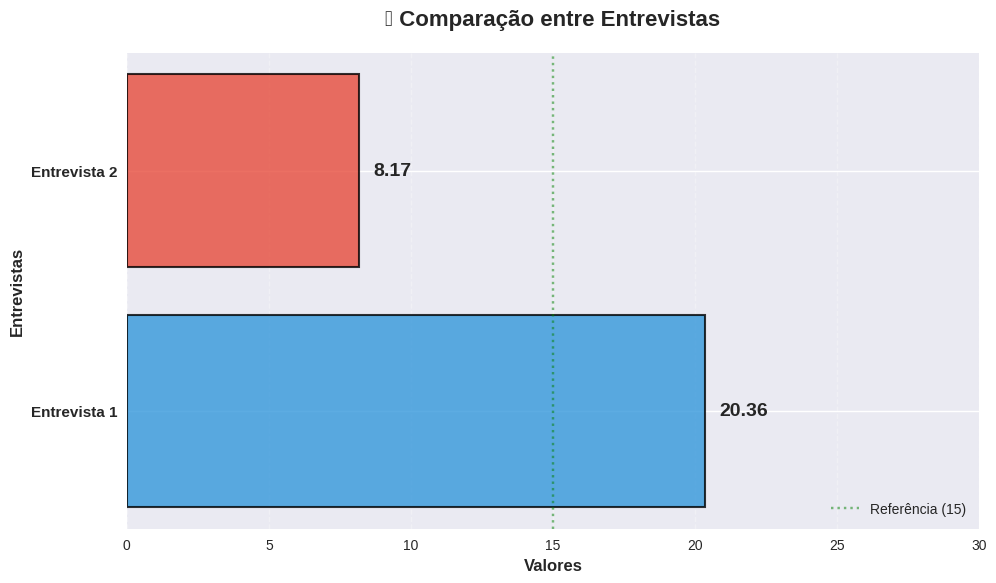

📈 ESTATÍSTICAS DAS ENTREVISTAS
Entrevista 1: 20.36
Entrevista 2: 8.17
Diferença: 12.19
Razão (E1/E2): 2.49x
Média: 14.27


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
entrevistas = ['Entrevista 1', 'Entrevista 2']
valores = [20.36, 8.17]
cores = ['#3498db', '#e74c3c']  # Azul e Vermelho

# Configurar o gráfico
plt.figure(figsize=(10, 6))
bars = plt.barh(entrevistas, valores, color=cores, alpha=0.8, edgecolor='black', linewidth=1.5)

# Personalizar o gráfico
plt.title('📊 Comparação entre Entrevistas', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Valores', fontsize=12, fontweight='bold')
plt.ylabel('Entrevistas', fontsize=12, fontweight='bold')

# Definir escala do X até 30
plt.xlim(0, 30)

# Adicionar valores nas barras
for bar, valor in zip(bars, valores):
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2.,
             f'{valor}', ha='left', va='center', fontsize=14, fontweight='bold')

# Configurar grade e estilo
plt.grid(axis='x', alpha=0.3, linestyle='--')

# Melhorar aparência
plt.tight_layout()
plt.yticks(fontsize=11, fontweight='bold')
plt.xticks(fontsize=10)

# Adicionar linha de referência (opcional)
plt.axvline(x=15, color='green', linestyle=':', alpha=0.5, label='Referência (15)')
plt.legend(loc='lower right')

# Mostrar o gráfico
plt.show()

# Exibir estatísticas
print("="*50)
print("📈 ESTATÍSTICAS DAS ENTREVISTAS")
print("="*50)
print(f"Entrevista 1: {valores[0]}")
print(f"Entrevista 2: {valores[1]}")
print(f"Diferença: {valores[0] - valores[1]:.2f}")
print(f"Razão (E1/E2): {valores[0]/valores[1]:.2f}x")
print(f"Média: {np.mean(valores):.2f}")
print("="*50)

## Análise de Sentimentos

Foram feitas várias tentativas de análise de sentimentos.

##### 1ª Tentativa

Aqui usamos o modelo BERT e o TextBlob, no entanto tivemos de dividir as perguntas por vários blocos de código, ou seja em cada bloco tem o mesmo código mas o número das perguntas vão mudando.
  - Primeiro bloco: pergunta 1 a 5
  - Segundo bloco: pergunta 6 a 8 (TextBlob)
  - Terceiro Bloco: 9 a 12
  - Quarto bloco: 13 a 15
  - Quinto Bloco: 16 a 19

A razão pelo qual optamos por fazer assim, foi porque o modelo BERT tem um limite de tokens e ao tentar analisar as perguntas todas de uma vez não suportava e só analisa até a pergunta 6.

### Entrevista 1

Perguntas 1 a 5

In [ ]:
from transformers import pipeline
import spacy
import re
import math

# Carrega modelos
nlp = spacy.load("pt_core_news_sm")
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")


# Processa com SpaCy
doc = nlp(Entrevista_dada)
texto_limpo = doc.text

# Extrair blocos numerados (pergunta + resposta)
blocos = re.findall(r'\d+\.\s(.*?)(?=\n\d+\.|\Z)', texto_limpo, re.DOTALL)

# Função para dividir texto em partes com até N tokens
def dividir_em_blocos(texto, n=512):
    palavras = texto.split()
    blocos = []
    for i in range(0, len(palavras), n):
        blocos.append(" ".join(palavras[i:i+n]))
    return blocos

# Analisar apenas as perguntas de 1 a 5
for i, bloco in enumerate(blocos[:5], 1):
    linhas = bloco.strip().split('\n')
    pergunta = linhas[0].strip()
    resposta = " ".join(linhas[1:]).strip()

    if resposta:
        blocos_resposta = dividir_em_blocos(resposta, n=512)
        pontuacoes = []
        for parte in blocos_resposta:
            resultado = sentiment_pipeline(parte)[0]
            pontuacoes.append(int(resultado["label"][0]))  # pega número da estrela

        media = sum(pontuacoes) / len(pontuacoes)
        print(f"🔹 Pergunta {i}: {pergunta}")
        print(f"🟢 Resposta (com {len(blocos_resposta)} partes): {resposta}")
        print(f"📊 Sentimento médio: {round(media, 2)} estrelas\n")

Perguntas 6 a 8

In [ ]:
from textblob import TextBlob
import spacy
import re

# Carrega o modelo do spaCy
nlp = spacy.load("pt_core_news_sm")

# Função de análise de sentimento com TextBlob
def analisar_sentimento_textblob(texto):
    blob = TextBlob(texto)
    return blob.sentiment.polarity  # de -1 a 1

# Converte polaridade em estrelas (1 a 5)
def polaridade_para_estrelas(polaridade):
    if polaridade <= -0.5:
        return 1
    elif polaridade <= 0:
        return 2
    elif polaridade <= 0.3:
        return 3
    elif polaridade <= 0.6:
        return 4
    else:
        return 5

# Processa o texto
doc = nlp(Entrevista_dada)
texto_limpo = doc.text

# Extrair blocos numerados
blocos = re.findall(r'\d+\.\s(.*?)(?=\n\d+\.|\Z)', texto_limpo, re.DOTALL)

# Analisa perguntas 6 a 8 (índices 5 a 7)
for i in range(5, 8):
    if i < len(blocos):
        bloco = blocos[i]
        linhas = bloco.strip().split('\n')
        pergunta = linhas[0].strip()
        resposta = " ".join(linhas[1:]).strip()

        if resposta:
            polaridade = analisar_sentimento_textblob(resposta)
            estrelas = polaridade_para_estrelas(polaridade)
            print(f"🔹 Pergunta {i+1}: {pergunta}")
            print(f"🟢 Resposta: {resposta}")
            print(f"📊 Polaridade: {round(polaridade, 2)}")
            print(f"⭐ Estrelas: {estrelas}\n")
        else:
            print(f"⚠️ Pergunta {i+1} sem resposta.\n")

Perguntas 9 a 12

In [ ]:
from transformers import pipeline
import spacy
import re

# Carrega modelos
nlp = spacy.load("pt_core_news_sm")
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Processa com SpaCy
doc = nlp(Entrevista_dada)
texto_limpo = doc.text

# Extrair blocos numerados (pergunta + resposta)
blocos = re.findall(r'\d+\.\s(.*?)(?=\n\d+\.|\Z)', texto_limpo, re.DOTALL)

# Função para dividir texto em partes com até N tokens (palavras, neste caso)
def dividir_em_blocos(texto, n=512):
    palavras = texto.split()
    blocos = []
    for i in range(0, len(palavras), n):
        blocos.append(" ".join(palavras[i:i+n]))
    return blocos

# Analisar perguntas 9 a 12 (índices 8 a 11)
for i in range(8, 12):
    if i >= len(blocos):
        print(f"⚠️ Pergunta {i+1} não encontrada.")
        continue

    bloco = blocos[i]
    linhas = bloco.strip().split('\n')
    pergunta = linhas[0].strip()
    resposta = " ".join(linhas[1:]).strip()

    if resposta:
        blocos_resposta = dividir_em_blocos(resposta, n=512)
        pontuacoes = []
        for parte in blocos_resposta:
            resultado = sentiment_pipeline(parte)[0]
            pontuacoes.append(int(resultado["label"][0]))  # número da estrela

        media = sum(pontuacoes) / len(pontuacoes)
        print(f"🔹 Pergunta {i+1}: {pergunta}")
        print(f"🟢 Resposta (com {len(blocos_resposta)} partes): {resposta}")
        print(f"📊 Sentimento médio: {round(media, 2)} estrelas\n")
    else:
        print(f"❌ Pergunta {i+1} não possui resposta.\n")

Perguntas 13 a 15

In [ ]:
from transformers import pipeline
import spacy
import re

# Carrega modelos
nlp = spacy.load("pt_core_news_sm")
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Processa com SpaCy
doc = nlp(Entrevista_dada)
texto_limpo = doc.text

# Extrair blocos numerados (pergunta + resposta)
blocos = re.findall(r'\d+\.\s(.*?)(?=\n\d+\.|\Z)', texto_limpo, re.DOTALL)

# Função para dividir texto em partes com até N tokens (palavras)
def dividir_em_blocos(texto, n=512):
    palavras = texto.split()
    blocos = []
    for i in range(0, len(palavras), n):
        blocos.append(" ".join(palavras[i:i+n]))
    return blocos

# Analisar perguntas 13 a 15 (índices 12 a 14)
for i in range(12, 15):
    if i >= len(blocos):
        print(f"⚠️ Pergunta {i+1} não encontrada.")
        continue

    bloco = blocos[i]
    linhas = bloco.strip().split('\n')
    pergunta = linhas[0].strip()
    resposta = " ".join(linhas[1:]).strip()

    if resposta:
        blocos_resposta = dividir_em_blocos(resposta, n=512)
        pontuacoes = []
        for parte in blocos_resposta:
            resultado = sentiment_pipeline(parte)[0]
            pontuacoes.append(int(resultado["label"][0]))  # número da estrela

        media = sum(pontuacoes) / len(pontuacoes)
        print(f"🔹 Pergunta {i+1}: {pergunta}")
        print(f"🟢 Resposta (com {len(blocos_resposta)} partes): {resposta}")
        print(f"📊 Sentimento médio: {round(media, 2)} estrelas\n")
    else:
        print(f"❌ Pergunta {i+1} não possui resposta.\n")

Perguntas 16 a 20

In [ ]:
from transformers import pipeline
import spacy
import re

# Carrega modelos
nlp = spacy.load("pt_core_news_sm")
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Processa com SpaCy
doc = nlp(Entrevista_dada)
texto_limpo = doc.text

# Extrair blocos numerados (pergunta + resposta)
blocos = re.findall(r'\d+\.\s(.*?)(?=\n\d+\.|\Z)', texto_limpo, re.DOTALL)

# Função para dividir texto em partes com até N tokens (palavras, neste caso)
def dividir_em_blocos(texto, n=512):
    palavras = texto.split()
    blocos = []
    for i in range(0, len(palavras), n):
        blocos.append(" ".join(palavras[i:i+n]))
    return blocos

# Analisar perguntas 16 a 20 (índices 15 a 19)
for i in range(15, 20):
    if i >= len(blocos):
        print(f"⚠️ Pergunta {i+1} não encontrada.")
        continue

    bloco = blocos[i]
    linhas = bloco.strip().split('\n')
    pergunta = linhas[0].strip()
    resposta = " ".join(linhas[1:]).strip()

    if resposta:
        blocos_resposta = dividir_em_blocos(resposta, n=512)
        pontuacoes = []
        for parte in blocos_resposta:
            resultado = sentiment_pipeline(parte)[0]
            pontuacoes.append(int(resultado["label"][0]))  # número da estrela

        media = sum(pontuacoes) / len(pontuacoes)
        print(f"🔹 Pergunta {i+1}: {pergunta}")
        print(f"🟢 Resposta (com {len(blocos_resposta)} partes): {resposta}")
        print(f"📊 Sentimento médio: {round(media, 2)} estrelas\n")
    else:
        print(f"❌ Pergunta {i+1} não possui resposta.\n")

### Entrevista 2

Perguntas de 1 a 5

In [ ]:
from transformers import pipeline
import spacy
import re
import math

# Carrega modelos
nlp = spacy.load("pt_core_news_sm")
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")


# Processa com SpaCy
doc = nlp(Entrevista_tio)
texto_limpo = doc.text

# Extrair blocos numerados (pergunta + resposta)
blocos = re.findall(r'\d+\.\s(.*?)(?=\n\d+\.|\Z)', texto_limpo, re.DOTALL)

# Função para dividir texto em partes com até N tokens
def dividir_em_blocos(texto, n=512):
    palavras = texto.split()
    blocos = []
    for i in range(0, len(palavras), n):
        blocos.append(" ".join(palavras[i:i+n]))
    return blocos

# Analisar apenas as perguntas de 1 a 5
for i, bloco in enumerate(blocos[:5], 1):
    linhas = bloco.strip().split('\n')
    pergunta = linhas[0].strip()
    resposta = " ".join(linhas[1:]).strip()

    if resposta:
        blocos_resposta = dividir_em_blocos(resposta, n=512)
        pontuacoes = []
        for parte in blocos_resposta:
            resultado = sentiment_pipeline(parte)[0]
            pontuacoes.append(int(resultado["label"][0]))  # pega número da estrela

        media = sum(pontuacoes) / len(pontuacoes)
        print(f"🔹 Pergunta {i}: {pergunta}")
        print(f"🟢 Resposta (com {len(blocos_resposta)} partes): {resposta}")
        print(f"📊 Sentimento médio: {round(media, 2)} estrelas\n")


Perguntas 6 a 8

In [ ]:
from textblob import TextBlob
import spacy
import re

# Carrega o modelo do spaCy
nlp = spacy.load("pt_core_news_sm")

# Função de análise de sentimento com TextBlob
def analisar_sentimento_textblob(texto):
    blob = TextBlob(texto)
    return blob.sentiment.polarity  # de -1 a 1

# Converte polaridade em estrelas (1 a 5)
def polaridade_para_estrelas(polaridade):
    if polaridade <= -0.5:
        return 1
    elif polaridade <= 0:
        return 2
    elif polaridade <= 0.3:
        return 3
    elif polaridade <= 0.6:
        return 4
    else:
        return 5

# Processa o texto
doc = nlp(Entrevista_tio)
texto_limpo = doc.text

# Extrair blocos numerados
blocos = re.findall(r'\d+\.\s(.*?)(?=\n\d+\.|\Z)', texto_limpo, re.DOTALL)

# Analisa perguntas 6 a 8 (índices 5 a 7)
for i in range(5, 8):
    if i < len(blocos):
        bloco = blocos[i]
        linhas = bloco.strip().split('\n')
        pergunta = linhas[0].strip()
        resposta = " ".join(linhas[1:]).strip()

        if resposta:
            polaridade = analisar_sentimento_textblob(resposta)
            estrelas = polaridade_para_estrelas(polaridade)
            print(f"🔹 Pergunta {i+1}: {pergunta}")
            print(f"🟢 Resposta: {resposta}")
            print(f"📊 Polaridade: {round(polaridade, 2)}")
            print(f"⭐ Estrelas: {estrelas}\n")
        else:
            print(f"⚠️ Pergunta {i+1} sem resposta.\n")

Perguntas 9 a 12

In [ ]:
from transformers import pipeline
import spacy
import re

# Carrega modelos
nlp = spacy.load("pt_core_news_sm")
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Processa com SpaCy
doc = nlp(Entrevista_tio)
texto_limpo = doc.text

# Extrair blocos numerados (pergunta + resposta)
blocos = re.findall(r'\d+\.\s(.*?)(?=\n\d+\.|\Z)', texto_limpo, re.DOTALL)

# Função para dividir texto em partes com até N tokens (palavras, neste caso)
def dividir_em_blocos(texto, n=512):
    palavras = texto.split()
    blocos = []
    for i in range(0, len(palavras), n):
        blocos.append(" ".join(palavras[i:i+n]))
    return blocos

# Analisar perguntas 9 a 12 (índices 8 a 11)
for i in range(8, 12):
    if i >= len(blocos):
        print(f"⚠️ Pergunta {i+1} não encontrada.")
        continue

    bloco = blocos[i]
    linhas = bloco.strip().split('\n')
    pergunta = linhas[0].strip()
    resposta = " ".join(linhas[1:]).strip()

    if resposta:
        blocos_resposta = dividir_em_blocos(resposta, n=512)
        pontuacoes = []
        for parte in blocos_resposta:
            resultado = sentiment_pipeline(parte)[0]
            pontuacoes.append(int(resultado["label"][0]))  # número da estrela

        media = sum(pontuacoes) / len(pontuacoes)
        print(f"🔹 Pergunta {i+1}: {pergunta}")
        print(f"🟢 Resposta (com {len(blocos_resposta)} partes): {resposta}")
        print(f"📊 Sentimento médio: {round(media, 2)} estrelas\n")
    else:
        print(f"❌ Pergunta {i+1} não possui resposta.\n")

Perguntas 13 a 15

In [ ]:
from transformers import pipeline
import spacy
import re

# Carrega modelos
nlp = spacy.load("pt_core_news_sm")
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Processa com SpaCy
doc = nlp(Entrevista_tio)
texto_limpo = doc.text

# Extrair blocos numerados (pergunta + resposta)
blocos = re.findall(r'\d+\.\s(.*?)(?=\n\d+\.|\Z)', texto_limpo, re.DOTALL)

# Função para dividir texto em partes com até N tokens (palavras)
def dividir_em_blocos(texto, n=512):
    palavras = texto.split()
    blocos = []
    for i in range(0, len(palavras), n):
        blocos.append(" ".join(palavras[i:i+n]))
    return blocos

# Analisar perguntas 13 a 15 (índices 12 a 14)
for i in range(12, 15):
    if i >= len(blocos):
        print(f"⚠️ Pergunta {i+1} não encontrada.")
        continue

    bloco = blocos[i]
    linhas = bloco.strip().split('\n')
    pergunta = linhas[0].strip()
    resposta = " ".join(linhas[1:]).strip()

    if resposta:
        blocos_resposta = dividir_em_blocos(resposta, n=512)
        pontuacoes = []
        for parte in blocos_resposta:
            resultado = sentiment_pipeline(parte)[0]
            pontuacoes.append(int(resultado["label"][0]))  # número da estrela

        media = sum(pontuacoes) / len(pontuacoes)
        print(f"🔹 Pergunta {i+1}: {pergunta}")
        print(f"🟢 Resposta (com {len(blocos_resposta)} partes): {resposta}")
        print(f"📊 Sentimento médio: {round(media, 2)} estrelas\n")
    else:
        print(f"❌ Pergunta {i+1} não possui resposta.\n")

Perguntas 15 a 19

In [ ]:
from transformers import pipeline
import spacy
import re

# Carrega modelos
nlp = spacy.load("pt_core_news_sm")
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Processa com SpaCy
doc = nlp(Entrevista_tio)
texto_limpo = doc.text

# Extrair blocos numerados (pergunta + resposta)
blocos = re.findall(r'\d+\.\s(.*?)(?=\n\d+\.|\Z)', texto_limpo, re.DOTALL)

# Função para dividir texto em partes com até N tokens (palavras, neste caso)
def dividir_em_blocos(texto, n=512):
    palavras = texto.split()
    blocos = []
    for i in range(0, len(palavras), n):
        blocos.append(" ".join(palavras[i:i+n]))
    return blocos

# Analisar perguntas 16 a 20 (índices 15 a 19)
for i in range(15, 20):
    if i >= len(blocos):
        print(f"⚠️ Pergunta {i+1} não encontrada.")
        continue

    bloco = blocos[i]
    linhas = bloco.strip().split('\n')
    pergunta = linhas[0].strip()
    resposta = " ".join(linhas[1:]).strip()

    if resposta:
        blocos_resposta = dividir_em_blocos(resposta, n=512)
        pontuacoes = []
        for parte in blocos_resposta:
            resultado = sentiment_pipeline(parte)[0]
            pontuacoes.append(int(resultado["label"][0]))  # número da estrela

        media = sum(pontuacoes) / len(pontuacoes)
        print(f"🔹 Pergunta {i+1}: {pergunta}")
        print(f"🟢 Resposta (com {len(blocos_resposta)} partes): {resposta}")
        print(f"📊 Sentimento médio: {round(media, 2)} estrelas\n")
    else:
        print(f"❌ Pergunta {i+1} não possui resposta.\n")

##### 2ª Tentativa

In [ ]:
!pip install transformers torch --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.5 MB/s eta 0:00:00


### Entrevista 1

In [ ]:
import spacy
from transformers import pipeline

# Carregar pipeline de análise de sentimento
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Processar o texto com SpaCy
doc = nlp(Entrevista_dada)

# Separar por sentenças (ou frases) com SpaCy e analisar sentimento com Transformers
for sent in doc.sents:
    texto = sent.text.strip()
    if texto:
        resultado = sentiment_pipeline(texto)[0]
        print(f"Fala: {texto}")
        print(f"Sentimento: {resultado['label']} (Confiança: {resultado['score']:.2f})\n")


Device set to use cpu


Fala: ﻿Olá,
Sentimento: 3 stars (Confiança: 0.27)

Fala: o meu nome é Francisca e vou entrevistar a minha irmã, Eduarda.
1.
Sentimento: 5 stars (Confiança: 0.42)

Fala: Onde e quando nasceste?
Sentimento: 1 star (Confiança: 0.36)

Fala: Nasci em Guimarães, a 9 de março de 2000. 

2.
Sentimento: 5 stars (Confiança: 0.26)

Fala: Como era a tua família e a tua escola quando eras criança?
Sentimento: 5 stars (Confiança: 0.48)

Fala: A minha família era uma boa família, mas era uma família assim um bocadinho instável.
Sentimento: 2 stars (Confiança: 0.47)

Fala: A nível escolar, fui muito feliz, tive uma boa infância nesse sentido. 

3.
Sentimento: 5 stars (Confiança: 0.53)

Fala: O que gostavas de fazer quando eras jovem?
Sentimento: 5 stars (Confiança: 0.26)

Fala: Quando era jovem gostava de andar de patins, gostava de estar com os meus amigos, gostava de estar com os meus avós no monte e com os meus primos, era basicamente isso.

4.
Sentimento: 4 stars (Confiança: 0.57)

Fala: Como te d

### Entrevista 2

In [ ]:
import spacy
from transformers import pipeline

# Carregar pipeline de análise de sentimento
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Processar o texto com SpaCy
doc = nlp(Entrevista_tio)

# Separar por sentenças (ou frases) com SpaCy e analisar sentimento com Transformers
for sent in doc.sents:
    texto = sent.text.strip()
    if texto:
        resultado = sentiment_pipeline(texto)[0]
        print(f"Fala: {texto}")
        print(f"Sentimento: {resultado['label']} (Confiança: {resultado['score']:.2f})\n")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


Fala: ﻿
Sentimento: 4 stars (Confiança: 0.28)

Fala: Boa noite, então, eu estou aqui com o meu tio.
Sentimento: 5 stars (Confiança: 0.35)

Fala: O meu nome é José Morgado, tio da Mariana.

 Então, onde e quando é que você nasceu?
Sentimento: 1 star (Confiança: 0.35)

Fala: Eu nasci no Hospital São Marcos de Braga, na freguesia São João dos Soutos, em 11 de março de 1953.
Sentimento: 5 stars (Confiança: 0.28)

Fala: Como é que era a sua família e a sua comunidade quando era criança?
Sentimento: 5 stars (Confiança: 0.28)

Fala: A família era uma família modesta, simples, não muito abastada, mas nunca houve fome propriamente dita.
Sentimento: 3 stars (Confiança: 0.39)

Fala: E a comunidade era a comunidade da aldeia, a comunidade que basicamente era a escola, era a igreja e o convívio lá com as pessoas do lugar, basicamente era isso.
Sentimento: 3 stars (Confiança: 0.27)

Fala: Que memórias tem da sua escola?
Sentimento: 3 stars (Confiança: 0.25)

Fala: Tem algum professor preferido, ou d

##### 3ª Tentativa

### Entrevista 1

In [ ]:
# Passo 2: Importar bibliotecas
from textblob import TextBlob
from google.colab import files

# Passo 3: Fazer upload do arquivo .txt
uploaded = files.upload()

# Passo 4: Ler o conteúdo do arquivo
for filename in uploaded.keys():
    with open(filename, 'r', encoding='utf-8') as file:
        texto = file.read()

# Passo 5: Análise de sentimento
blob = TextBlob(texto)

# Polarity: -1 (negativo) a 1 (positivo)
# Subjectivity: 0 (objetivo) a 1 (subjetivo)
print("Texto analisado:")
print(texto[:300] + "..." if len(texto) > 300 else texto)
print("\nAnálise de Sentimento:")
print(f"Polaridade: {blob.sentiment.polarity}")
print(f"Subjetividade: {blob.sentiment.subjectivity}")

# Classificação simples
if blob.sentiment.polarity > 0:
    print("Sentimento: Positivo 😊")
elif blob.sentiment.polarity < 0:
    print("Sentimento: Negativo 😠")
else:
    print("Sentimento: Neutro 😐")


Saving Entrevista_dada.txt to Entrevista_dada (1).txt
Texto analisado:
﻿Olá, o meu nome é Francisca e vou entrevistar a minha irmã, Eduarda.
1. Onde e quando nasceste? 

Nasci em Guimarães, a 9 de março de 2000. 

2. Como era a tua família e a tua escola quando eras criança? 

A minha família era uma boa família, mas era uma família assim um bocadinho instável. A nível...

Análise de Sentimento:
Polaridade: 0.0
Subjetividade: 0.1
Sentimento: Neutro 😐


#### Gráfico


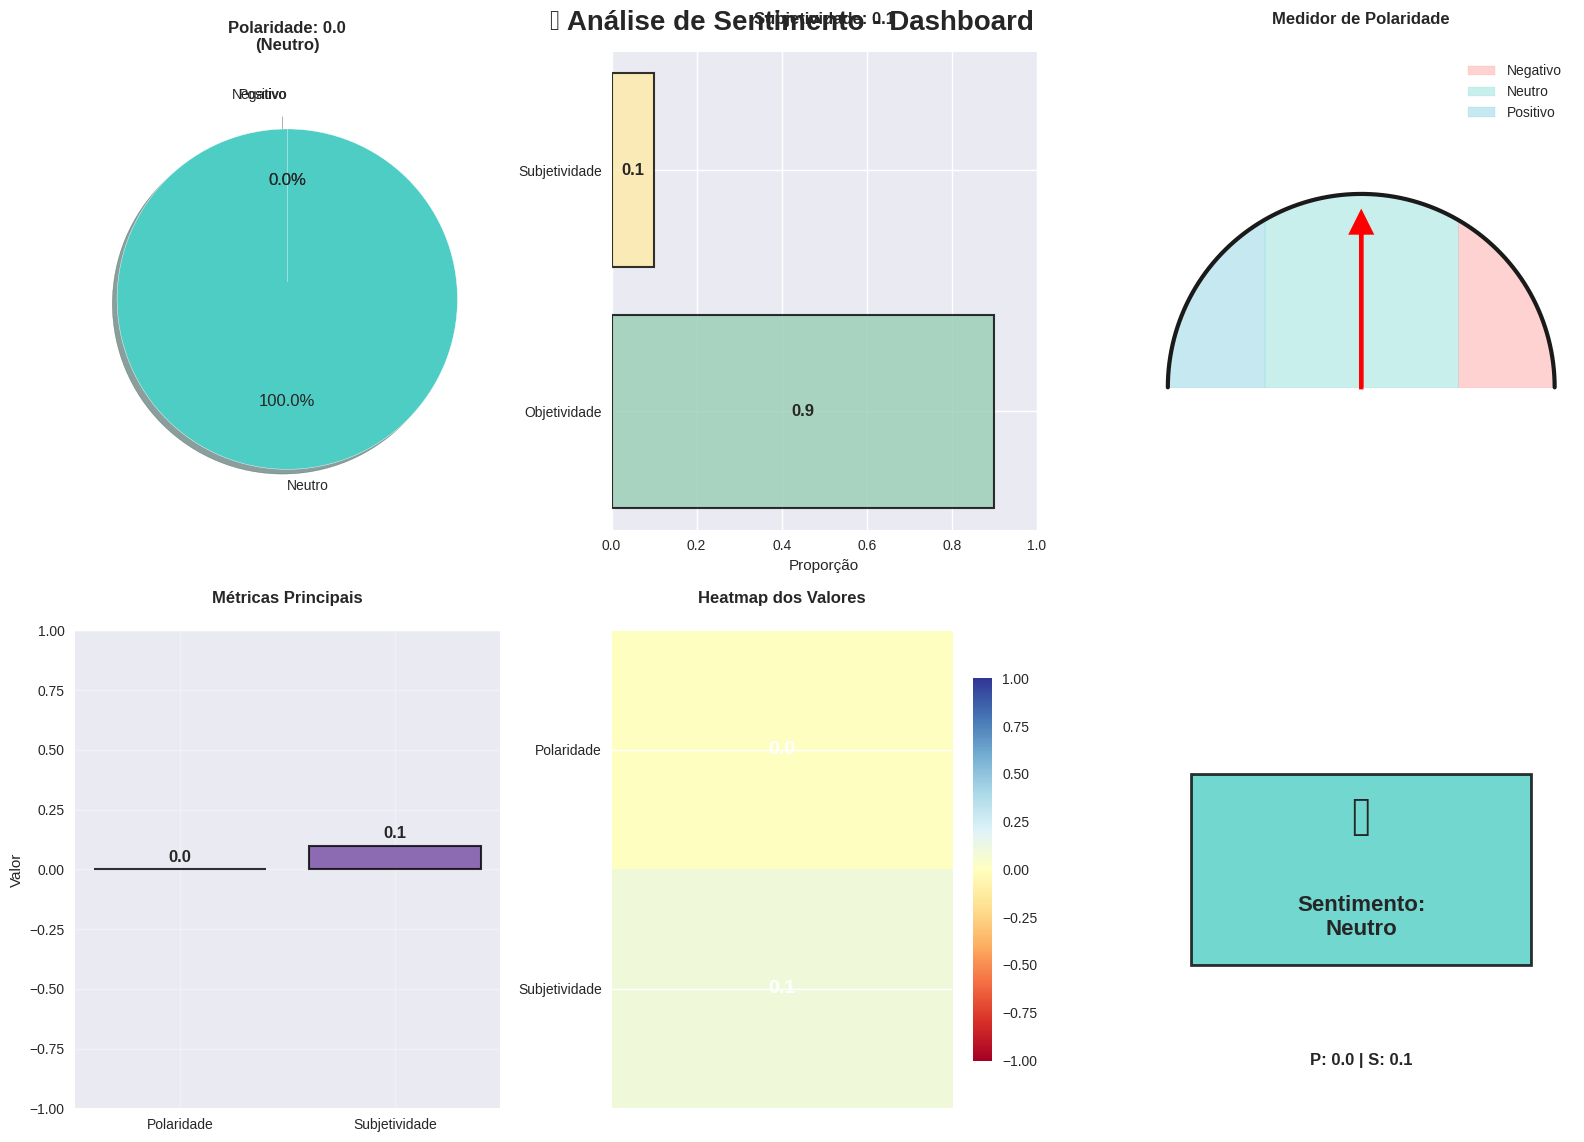

📊 RESUMO DA ANÁLISE DE SENTIMENTO
🎯 Polaridade: 0.0 (Neutro)
📝 Subjetividade: 0.1
😊 Sentimento: Neutro 😐
--------------------------------------------------
💡 Interpretação:
   • Texto completamente neutro
   • Conteúdo muito objetivo e factual


In [ ]:
# Código para Google Colab - Visualização de Análise de Sentimento

# Importar bibliotecas necessárias
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Wedge
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo dos gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Dados da análise de sentimento
dados_sentimento = {
    'polaridade': 0.0,
    'subjetividade': 0.1,
    'sentimento': 'Neutro',
    'emoji': '😐'
}

# Criar figura com subplots
fig = plt.figure(figsize=(16, 12))
fig.suptitle('📊 Análise de Sentimento - Dashboard', fontsize=20, fontweight='bold', y=0.95)

# 1. Gráfico de Polaridade (Pizza)
ax1 = plt.subplot(2, 3, 1)
polaridade = dados_sentimento['polaridade']

# Determinar categoria da polaridade
if polaridade < -0.1:
    valores_polaridade = [abs(polaridade), 0, 0]
    categoria = 'Negativo'
elif polaridade > 0.1:
    valores_polaridade = [0, 0, polaridade]
    categoria = 'Positivo'
else:
    valores_polaridade = [0, 1, 0]
    categoria = 'Neutro'

labels_polaridade = ['Negativo', 'Neutro', 'Positivo']
cores_polaridade = ['#ff6b6b', '#4ecdc4', '#45b7d1']
explode = (0.05, 0.05, 0.05)

plt.pie(valores_polaridade, labels=labels_polaridade, colors=cores_polaridade,
        explode=explode, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title(f'Polaridade: {polaridade}\n({categoria})', fontweight='bold', pad=20)

# 2. Gráfico de Subjetividade (Barras horizontais)
ax2 = plt.subplot(2, 3, 2)
subjetividade = dados_sentimento['subjetividade']
objetividade = 1 - subjetividade

categorias = ['Objetividade', 'Subjetividade']
valores = [objetividade, subjetividade]
cores_sub = ['#96ceb4', '#ffeaa7']

bars = plt.barh(categorias, valores, color=cores_sub, alpha=0.8, edgecolor='black', linewidth=1.5)
plt.xlim(0, 1)
plt.xlabel('Proporção')
plt.title(f'Subjetividade: {subjetividade}', fontweight='bold', pad=20)

# Adicionar valores nas barras
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width/2, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}', ha='center', va='center', fontweight='bold', fontsize=12)

# 3. Gauge Chart para Polaridade
ax3 = plt.subplot(2, 3, 3)
theta = np.linspace(0, np.pi, 100)
r = 1

# Criar semicírculo
x = r * np.cos(theta)
y = r * np.sin(theta)
plt.plot(x, y, 'k-', linewidth=3)

# Colorir seções
theta_neg = np.linspace(0, np.pi/3, 50)
theta_neu = np.linspace(np.pi/3, 2*np.pi/3, 50)
theta_pos = np.linspace(2*np.pi/3, np.pi, 50)

plt.fill_between(np.cos(theta_neg), np.sin(theta_neg), alpha=0.3, color='#ff6b6b', label='Negativo')
plt.fill_between(np.cos(theta_neu), np.sin(theta_neu), alpha=0.3, color='#4ecdc4', label='Neutro')
plt.fill_between(np.cos(theta_pos), np.sin(theta_pos), alpha=0.3, color='#45b7d1', label='Positivo')

# Ponteiro para polaridade
angulo_ponteiro = np.pi/2 + (polaridade * np.pi/2)
x_ponteiro = 0.8 * np.cos(angulo_ponteiro)
y_ponteiro = 0.8 * np.sin(angulo_ponteiro)
plt.arrow(0, 0, x_ponteiro, y_ponteiro, head_width=0.1, head_length=0.1,
          fc='red', ec='red', linewidth=3)

plt.xlim(-1.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.axis('equal')
plt.axis('off')
plt.title('Medidor de Polaridade', fontweight='bold', pad=20)
plt.legend(loc='upper right')

# 4. Gráfico de barras com os valores principais
ax4 = plt.subplot(2, 3, 4)
metricas = ['Polaridade', 'Subjetividade']
valores_metricas = [dados_sentimento['polaridade'], dados_sentimento['subjetividade']]
cores_metricas = ['#667eea', '#764ba2']

bars = plt.bar(metricas, valores_metricas, color=cores_metricas, alpha=0.8,
               edgecolor='black', linewidth=1.5)
plt.ylim(-1, 1)
plt.ylabel('Valor')
plt.title('Métricas Principais', fontweight='bold', pad=20)
plt.grid(True, alpha=0.3)

# Adicionar valores nas barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02 if height >= 0 else height - 0.05,
             f'{height:.1f}', ha='center', va='bottom' if height >= 0 else 'top',
             fontweight='bold', fontsize=12)

# 5. Heatmap de resumo
ax5 = plt.subplot(2, 3, 5)
dados_heatmap = np.array([[dados_sentimento['polaridade']],
                         [dados_sentimento['subjetividade']]])
labels_heatmap = ['Polaridade', 'Subjetividade']

im = plt.imshow(dados_heatmap, cmap='RdYlBu', aspect='auto', vmin=-1, vmax=1)
plt.yticks(range(len(labels_heatmap)), labels_heatmap)
plt.xticks([])
plt.title('Heatmap dos Valores', fontweight='bold', pad=20)

# Adicionar valores no heatmap
for i in range(len(labels_heatmap)):
    plt.text(0, i, f'{dados_heatmap[i][0]:.1f}', ha='center', va='center',
             fontweight='bold', fontsize=14, color='white')

plt.colorbar(im, shrink=0.8)

# 6. Card de resultado final
ax6 = plt.subplot(2, 3, 6)
plt.axis('off')

# Criar um retângulo colorido como fundo
if categoria == 'Positivo':
    cor_fundo = '#45b7d1'
elif categoria == 'Negativo':
    cor_fundo = '#ff6b6b'
else:
    cor_fundo = '#4ecdc4'

rect = plt.Rectangle((0.1, 0.3), 0.8, 0.4, facecolor=cor_fundo, alpha=0.8,
                    edgecolor='black', linewidth=2)
ax6.add_patch(rect)

# Texto do resultado
plt.text(0.5, 0.6, dados_sentimento['emoji'], ha='center', va='center',
         fontsize=40, transform=ax6.transAxes)
plt.text(0.5, 0.4, f"Sentimento:\n{dados_sentimento['sentimento']}",
         ha='center', va='center', fontsize=16, fontweight='bold',
         transform=ax6.transAxes)
plt.text(0.5, 0.1, f"P: {dados_sentimento['polaridade']:.1f} | S: {dados_sentimento['subjetividade']:.1f}",
         ha='center', va='center', fontsize=12, fontweight='bold',
         transform=ax6.transAxes)

plt.xlim(0, 1)
plt.ylim(0, 1)

# Ajustar layout e mostrar
plt.tight_layout()
plt.show()

# Imprimir resumo textual
print("="*50)
print("📊 RESUMO DA ANÁLISE DE SENTIMENTO")
print("="*50)
print(f"🎯 Polaridade: {dados_sentimento['polaridade']:.1f} ({categoria})")
print(f"📝 Subjetividade: {dados_sentimento['subjetividade']:.1f}")
print(f"😊 Sentimento: {dados_sentimento['sentimento']} {dados_sentimento['emoji']}")
print("-"*50)
print("💡 Interpretação:")
if dados_sentimento['polaridade'] == 0:
    print("   • Texto completamente neutro")
elif abs(dados_sentimento['polaridade']) < 0.1:
    print("   • Texto praticamente neutro")

if dados_sentimento['subjetividade'] < 0.2:
    print("   • Conteúdo muito objetivo e factual")
elif dados_sentimento['subjetividade'] < 0.5:
    print("   • Conteúdo mais objetivo que subjetivo")
else:
    print("   • Conteúdo subjetivo com opiniões")
print("="*50)

### Entrevista 2

In [ ]:
# Passo 1: Instalar bibliotecas necessárias
!pip install textblob

# Passo 2: Importar bibliotecas
from textblob import TextBlob
from google.colab import files

# Passo 3: Fazer upload do arquivo .txt
uploaded = files.upload()

# Passo 4: Ler o conteúdo do arquivo
for filename in uploaded.keys():
    with open(filename, 'r', encoding='utf-8') as file:
        texto = file.read()

# Passo 5: Análise de sentimento
blob = TextBlob(texto)

# Polarity: -1 (negativo) a 1 (positivo)
# Subjectivity: 0 (objetivo) a 1 (subjetivo)
print("Texto analisado:")
print(texto[:300] + "..." if len(texto) > 300 else texto)
print("\nAnálise de Sentimento:")
print(f"Polaridade: {blob.sentiment.polarity}")
print(f"Subjetividade: {blob.sentiment.subjectivity}")

# Classificação simples
if blob.sentiment.polarity > 0:
    print("Sentimento: Positivo 😊")
elif blob.sentiment.polarity < 0:
    print("Sentimento: Negativo 😠")
else:
    print("Sentimento: Neutro 😐")



Saving Entrevista_tio.txt to Entrevista_tio (1).txt
Texto analisado:
﻿
 Boa noite, então, eu estou aqui com o meu tio.
 
 O meu nome é José Morgado, tio da Mariana.

 Então, onde e quando é que você nasceu?

 Eu nasci no Hospital São Marcos de Braga, na freguesia São João dos Soutos, em 11 de março de 1953.

 Como é que era a sua família e a sua comunidade quando era...

Análise de Sentimento:
Polaridade: 0.07048611111111111
Subjetividade: 0.6277777777777778
Sentimento: Positivo 😊


#### Gráfico

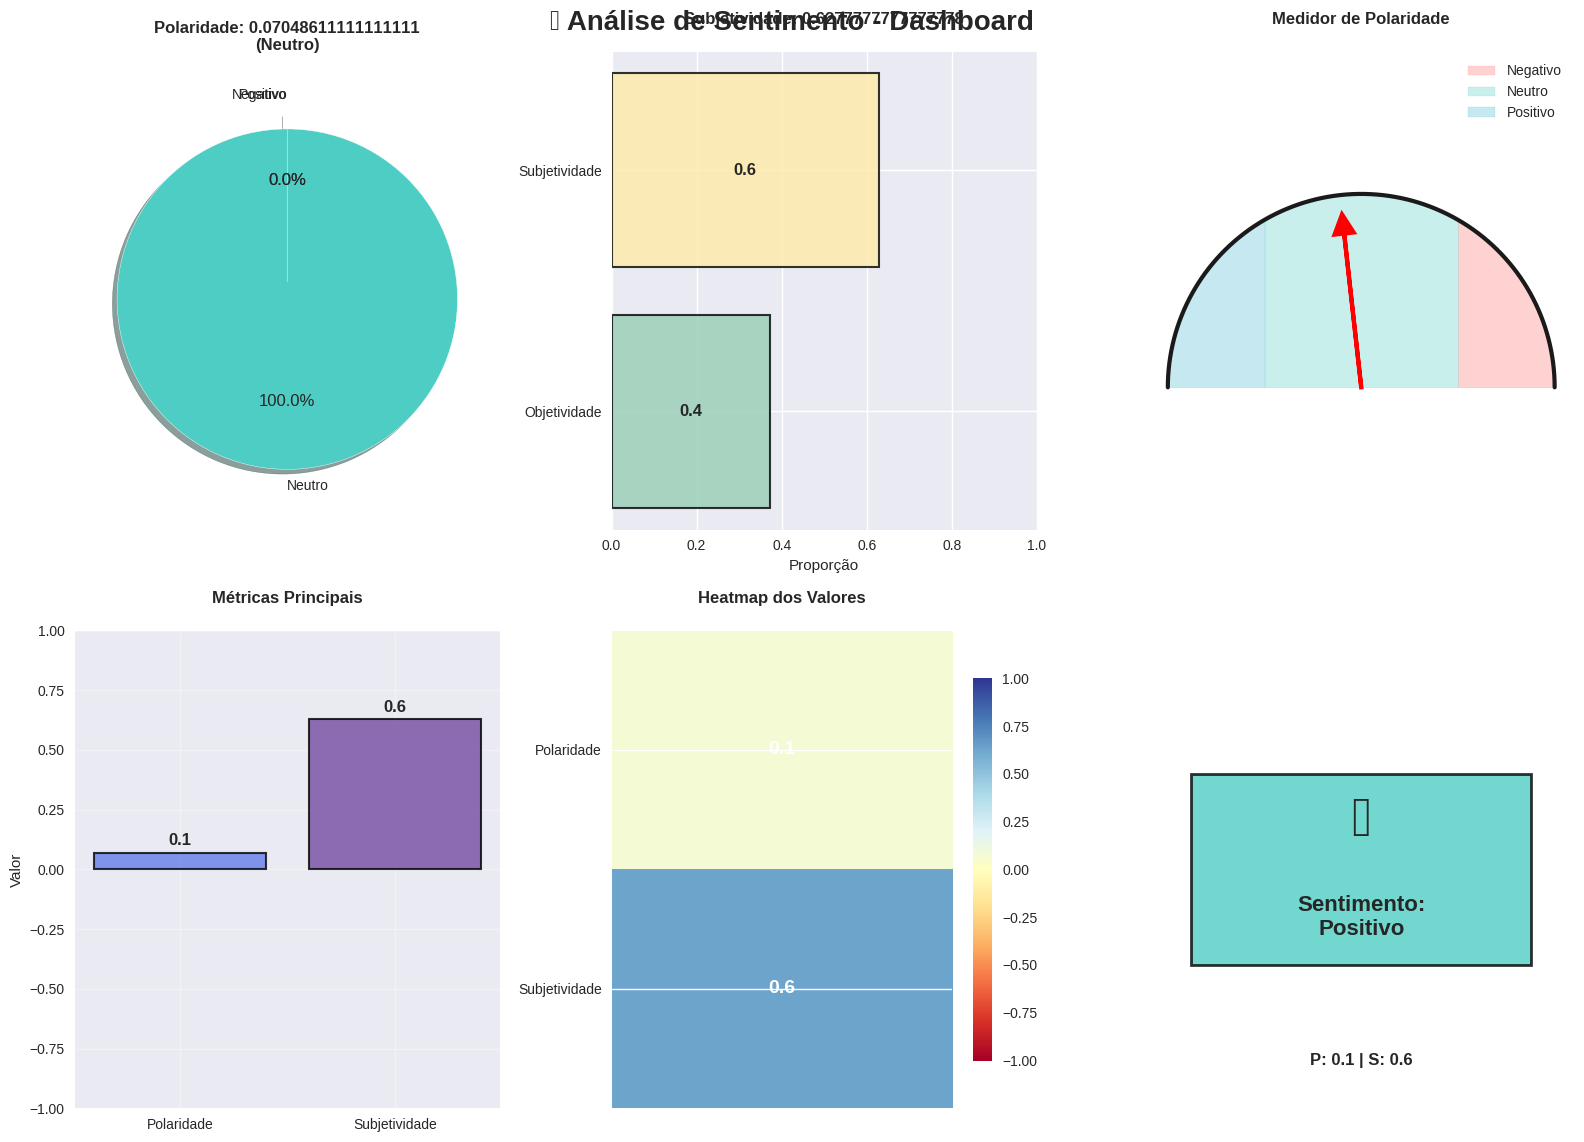

📊 RESUMO DA ANÁLISE DE SENTIMENTO
🎯 Polaridade: 0.070 (Neutro)
📝 Subjetividade: 0.628
😊 Sentimento: Positivo 😊
--------------------------------------------------
💡 Interpretação:
   • Texto com tendência positiva
   • Conteúdo altamente subjetivo com muitas opiniões


In [ ]:
# Código para Google Colab - Visualização de Análise de Sentimento

# Importar bibliotecas necessárias
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Wedge
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo dos gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Dados da análise de sentimento
dados_sentimento = {
    'polaridade': 0.07048611111111111,
    'subjetividade': 0.6277777777777778,
    'sentimento': 'Positivo',
    'emoji': '😊'
}

# Criar figura com subplots
fig = plt.figure(figsize=(16, 12))
fig.suptitle('📊 Análise de Sentimento - Dashboard', fontsize=20, fontweight='bold', y=0.95)

# 1. Gráfico de Polaridade (Pizza)
ax1 = plt.subplot(2, 3, 1)
polaridade = dados_sentimento['polaridade']

# Determinar categoria da polaridade
if polaridade < -0.1:
    valores_polaridade = [abs(polaridade), 0, 0]
    categoria = 'Negativo'
elif polaridade > 0.1:
    valores_polaridade = [0, 0, polaridade]
    categoria = 'Positivo'
else:
    valores_polaridade = [0, 1, 0]
    categoria = 'Neutro'

labels_polaridade = ['Negativo', 'Neutro', 'Positivo']
cores_polaridade = ['#ff6b6b', '#4ecdc4', '#45b7d1']
explode = (0.05, 0.05, 0.05)

plt.pie(valores_polaridade, labels=labels_polaridade, colors=cores_polaridade,
        explode=explode, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title(f'Polaridade: {polaridade}\n({categoria})', fontweight='bold', pad=20)

# 2. Gráfico de Subjetividade (Barras horizontais)
ax2 = plt.subplot(2, 3, 2)
subjetividade = dados_sentimento['subjetividade']
objetividade = 1 - subjetividade

categorias = ['Objetividade', 'Subjetividade']
valores = [objetividade, subjetividade]
cores_sub = ['#96ceb4', '#ffeaa7']

bars = plt.barh(categorias, valores, color=cores_sub, alpha=0.8, edgecolor='black', linewidth=1.5)
plt.xlim(0, 1)
plt.xlabel('Proporção')
plt.title(f'Subjetividade: {subjetividade}', fontweight='bold', pad=20)

# Adicionar valores nas barras
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width/2, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}', ha='center', va='center', fontweight='bold', fontsize=12)

# 3. Gauge Chart para Polaridade
ax3 = plt.subplot(2, 3, 3)
theta = np.linspace(0, np.pi, 100)
r = 1

# Criar semicírculo
x = r * np.cos(theta)
y = r * np.sin(theta)
plt.plot(x, y, 'k-', linewidth=3)

# Colorir seções
theta_neg = np.linspace(0, np.pi/3, 50)
theta_neu = np.linspace(np.pi/3, 2*np.pi/3, 50)
theta_pos = np.linspace(2*np.pi/3, np.pi, 50)

plt.fill_between(np.cos(theta_neg), np.sin(theta_neg), alpha=0.3, color='#ff6b6b', label='Negativo')
plt.fill_between(np.cos(theta_neu), np.sin(theta_neu), alpha=0.3, color='#4ecdc4', label='Neutro')
plt.fill_between(np.cos(theta_pos), np.sin(theta_pos), alpha=0.3, color='#45b7d1', label='Positivo')

# Ponteiro para polaridade
angulo_ponteiro = np.pi/2 + (polaridade * np.pi/2)
x_ponteiro = 0.8 * np.cos(angulo_ponteiro)
y_ponteiro = 0.8 * np.sin(angulo_ponteiro)
plt.arrow(0, 0, x_ponteiro, y_ponteiro, head_width=0.1, head_length=0.1,
          fc='red', ec='red', linewidth=3)

plt.xlim(-1.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.axis('equal')
plt.axis('off')
plt.title('Medidor de Polaridade', fontweight='bold', pad=20)
plt.legend(loc='upper right')

# 4. Gráfico de barras com os valores principais
ax4 = plt.subplot(2, 3, 4)
metricas = ['Polaridade', 'Subjetividade']
valores_metricas = [dados_sentimento['polaridade'], dados_sentimento['subjetividade']]
cores_metricas = ['#667eea', '#764ba2']

bars = plt.bar(metricas, valores_metricas, color=cores_metricas, alpha=0.8,
               edgecolor='black', linewidth=1.5)
plt.ylim(-1, 1)
plt.ylabel('Valor')
plt.title('Métricas Principais', fontweight='bold', pad=20)
plt.grid(True, alpha=0.3)

# Adicionar valores nas barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02 if height >= 0 else height - 0.05,
             f'{height:.1f}', ha='center', va='bottom' if height >= 0 else 'top',
             fontweight='bold', fontsize=12)

# 5. Heatmap de resumo
ax5 = plt.subplot(2, 3, 5)
dados_heatmap = np.array([[dados_sentimento['polaridade']],
                         [dados_sentimento['subjetividade']]])
labels_heatmap = ['Polaridade', 'Subjetividade']

im = plt.imshow(dados_heatmap, cmap='RdYlBu', aspect='auto', vmin=-1, vmax=1)
plt.yticks(range(len(labels_heatmap)), labels_heatmap)
plt.xticks([])
plt.title('Heatmap dos Valores', fontweight='bold', pad=20)

# Adicionar valores no heatmap
for i in range(len(labels_heatmap)):
    plt.text(0, i, f'{dados_heatmap[i][0]:.1f}', ha='center', va='center',
             fontweight='bold', fontsize=14, color='white')

plt.colorbar(im, shrink=0.8)

# 6. Card de resultado final
ax6 = plt.subplot(2, 3, 6)
plt.axis('off')

# Criar um retângulo colorido como fundo
if categoria == 'Positivo':
    cor_fundo = '#45b7d1'
elif categoria == 'Negativo':
    cor_fundo = '#ff6b6b'
else:
    cor_fundo = '#4ecdc4'

rect = plt.Rectangle((0.1, 0.3), 0.8, 0.4, facecolor=cor_fundo, alpha=0.8,
                    edgecolor='black', linewidth=2)
ax6.add_patch(rect)

# Texto do resultado
plt.text(0.5, 0.6, dados_sentimento['emoji'], ha='center', va='center',
         fontsize=40, transform=ax6.transAxes)
plt.text(0.5, 0.4, f"Sentimento:\n{dados_sentimento['sentimento']}",
         ha='center', va='center', fontsize=16, fontweight='bold',
         transform=ax6.transAxes)
plt.text(0.5, 0.1, f"P: {dados_sentimento['polaridade']:.1f} | S: {dados_sentimento['subjetividade']:.1f}",
         ha='center', va='center', fontsize=12, fontweight='bold',
         transform=ax6.transAxes)

plt.xlim(0, 1)
plt.ylim(0, 1)

# Ajustar layout e mostrar
plt.tight_layout()
plt.show()

# Imprimir resumo textual
print("="*50)
print("📊 RESUMO DA ANÁLISE DE SENTIMENTO")
print("="*50)
print(f"🎯 Polaridade: {dados_sentimento['polaridade']:.3f} ({categoria})")
print(f"📝 Subjetividade: {dados_sentimento['subjetividade']:.3f}")
print(f"😊 Sentimento: {dados_sentimento['sentimento']} {dados_sentimento['emoji']}")
print("-"*50)
print("💡 Interpretação:")
if dados_sentimento['polaridade'] > 0.05:
    print("   • Texto com tendência positiva")
elif dados_sentimento['polaridade'] < -0.05:
    print("   • Texto com tendência negativa")
else:
    print("   • Texto neutro")

if dados_sentimento['subjetividade'] > 0.6:
    print("   • Conteúdo altamente subjetivo com muitas opiniões")
elif dados_sentimento['subjetividade'] > 0.4:
    print("   • Conteúdo moderadamente subjetivo")
elif dados_sentimento['subjetividade'] > 0.2:
    print("   • Conteúdo mais objetivo que subjetivo")
else:
    print("   • Conteúdo muito objetivo e factual")
print("="*50)

#### Comparação em Gráfico

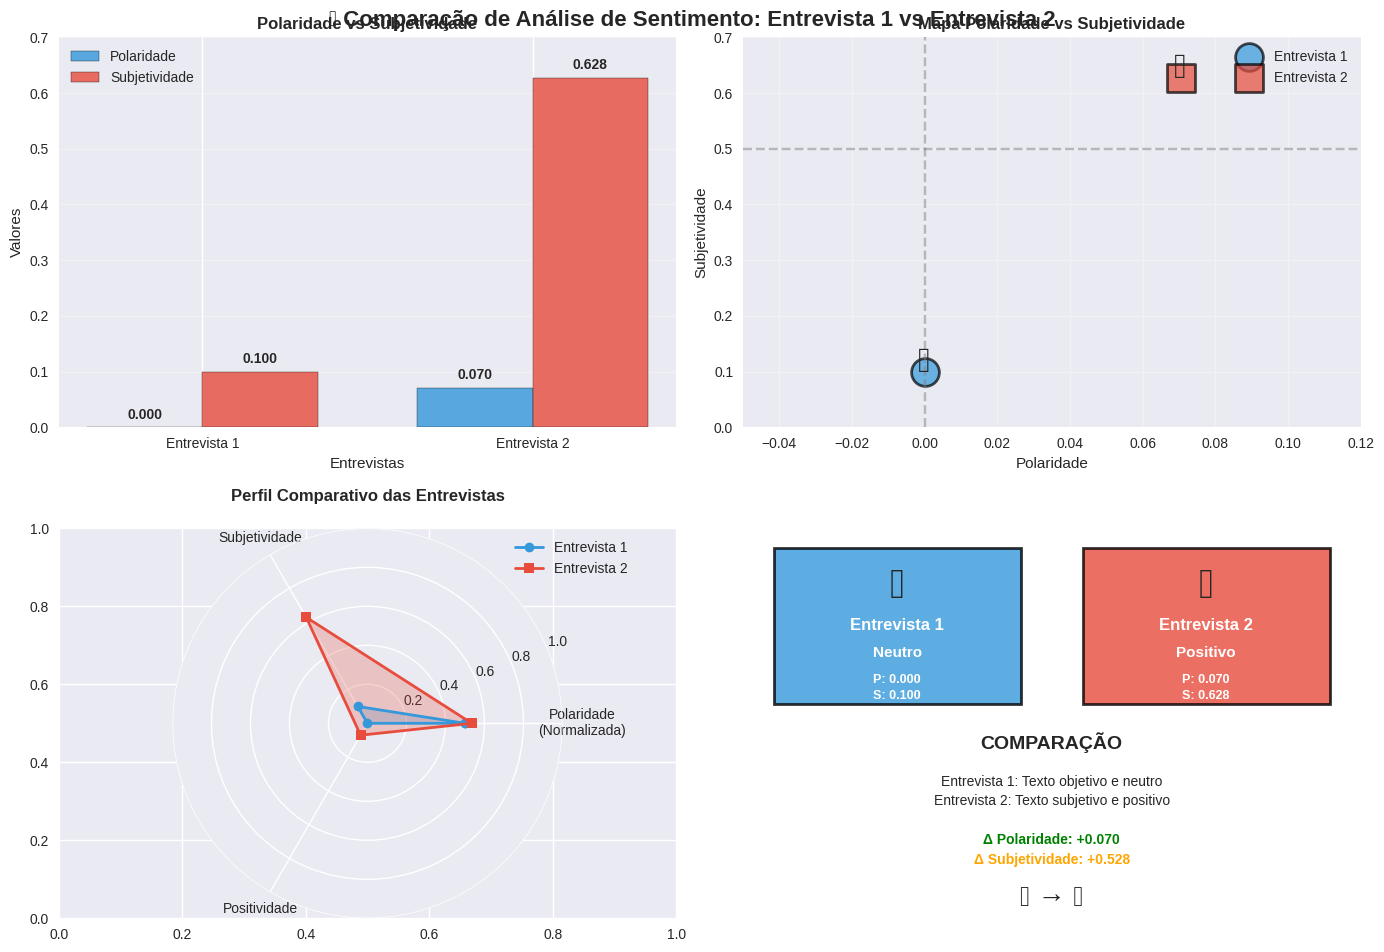

📊 COMPARAÇÃO ENTRE ENTREVISTAS
  Entrevista  Polaridade  Subjetividade Sentimento Emoji
Entrevista 1    0.000000       0.100000     Neutro     😐
Entrevista 2    0.070486       0.627778   Positivo     😊
🎯 INTERPRETAÇÃO:
   • Entrevista 1: Discurso neutro e objetivo (factual)
   • Entrevista 2: Discurso positivo e subjetivo (opinativo)
   • A segunda entrevista mostra mais emoção e opinião pessoal
   • Diferença na polaridade: +0.070 (mais positiva)
   • Diferença na subjetividade: +0.528 (muito mais subjetiva)


In [ ]:
# Código para Google Colab - Comparação entre Entrevista 1 e Entrevista 2

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')

# Dados das duas entrevistas
dados_entrevistas = {
    'Entrevista 1': {
        'polaridade': 0.0,
        'subjetividade': 0.1,
        'sentimento': 'Neutro',
        'emoji': '😐'
    },
    'Entrevista 2': {
        'polaridade': 0.07048611111111111,
        'subjetividade': 0.6277777777777778,
        'sentimento': 'Positivo',
        'emoji': '😊'
    }
}

# Criar figura com layout otimizado
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('📊 Comparação de Análise de Sentimento: Entrevista 1 vs Entrevista 2',
             fontsize=16, fontweight='bold', y=0.95)

# 1. Gráfico de barras agrupadas - Métricas principais
entrevistas = ['Entrevista 1', 'Entrevista 2']
polaridades = [dados_entrevistas['Entrevista 1']['polaridade'],
               dados_entrevistas['Entrevista 2']['polaridade']]
subjetividades = [dados_entrevistas['Entrevista 1']['subjetividade'],
                  dados_entrevistas['Entrevista 2']['subjetividade']]

x = np.arange(len(entrevistas))
width = 0.35

bars1 = ax1.bar(x - width/2, polaridades, width, label='Polaridade',
                color='#3498db', alpha=0.8, edgecolor='black')
bars2 = ax1.bar(x + width/2, subjetividades, width, label='Subjetividade',
                color='#e74c3c', alpha=0.8, edgecolor='black')

ax1.set_xlabel('Entrevistas')
ax1.set_ylabel('Valores')
ax1.set_title('Polaridade vs Subjetividade', fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(entrevistas)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_ylim(0, 0.7)

# Adicionar valores nas barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom',
                fontweight='bold', fontsize=10)

# 2. Gráfico de dispersão
ax2.scatter(dados_entrevistas['Entrevista 1']['polaridade'],
           dados_entrevistas['Entrevista 1']['subjetividade'],
           s=400, c='#3498db', alpha=0.7, edgecolors='black', linewidth=2,
           label='Entrevista 1', marker='o')
ax2.scatter(dados_entrevistas['Entrevista 2']['polaridade'],
           dados_entrevistas['Entrevista 2']['subjetividade'],
           s=400, c='#e74c3c', alpha=0.7, edgecolors='black', linewidth=2,
           label='Entrevista 2', marker='s')

# Adicionar emojis como anotações
ax2.annotate('😐', xy=(dados_entrevistas['Entrevista 1']['polaridade'],
                      dados_entrevistas['Entrevista 1']['subjetividade']),
             xytext=(0, 0), textcoords='offset points', fontsize=25, ha='center')
ax2.annotate('😊', xy=(dados_entrevistas['Entrevista 2']['polaridade'],
                      dados_entrevistas['Entrevista 2']['subjetividade']),
             xytext=(0, 0), textcoords='offset points', fontsize=25, ha='center')

ax2.set_xlabel('Polaridade')
ax2.set_ylabel('Subjetividade')
ax2.set_title('Mapa Polaridade vs Subjetividade', fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_xlim(-0.05, 0.12)
ax2.set_ylim(0, 0.7)

# Adicionar linhas de referência
ax2.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, label='Subjetividade Média')
ax2.axvline(x=0, color='gray', linestyle='--', alpha=0.5, label='Neutralidade')

# 3. Gráfico de radar comparativo
categories = ['Polaridade\n(Normalizada)', 'Subjetividade', 'Positividade']
N = len(categories)

# Preparar valores para o radar
valores_ent1 = [
    (dados_entrevistas['Entrevista 1']['polaridade'] + 1) / 2,  # Normalizar para 0-1
    dados_entrevistas['Entrevista 1']['subjetividade'],
    max(0, dados_entrevistas['Entrevista 1']['polaridade'])
]
valores_ent2 = [
    (dados_entrevistas['Entrevista 2']['polaridade'] + 1) / 2,
    dados_entrevistas['Entrevista 2']['subjetividade'],
    max(0, dados_entrevistas['Entrevista 2']['polaridade'])
]

# Ângulos para cada eixo
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Fechar o polígono
valores_ent1 += valores_ent1[:1]
valores_ent2 += valores_ent2[:1]

ax3 = plt.subplot(2, 2, 3, projection='polar')
ax3.plot(angles, valores_ent1, 'o-', linewidth=2, label='Entrevista 1', color='#3498db')
ax3.fill(angles, valores_ent1, alpha=0.25, color='#3498db')
ax3.plot(angles, valores_ent2, 's-', linewidth=2, label='Entrevista 2', color='#e74c3c')
ax3.fill(angles, valores_ent2, alpha=0.25, color='#e74c3c')

ax3.set_xticks(angles[:-1])
ax3.set_xticklabels(categories)
ax3.set_ylim(0, 1)
ax3.set_title('Perfil Comparativo das Entrevistas', fontweight='bold', pad=20)
ax3.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

# 4. Cards resumo das entrevistas
ax4.axis('off')

# Card Entrevista 1
rect1 = plt.Rectangle((0.05, 0.55), 0.4, 0.4, facecolor='#3498db', alpha=0.8,
                     edgecolor='black', linewidth=2, transform=ax4.transAxes)
ax4.add_patch(rect1)

ax4.text(0.25, 0.85, '😐', ha='center', va='center', fontsize=30, transform=ax4.transAxes)
ax4.text(0.25, 0.75, 'Entrevista 1', ha='center', va='center', fontsize=12,
         fontweight='bold', transform=ax4.transAxes, color='white')
ax4.text(0.25, 0.68, 'Neutro', ha='center', va='center', fontsize=11,
         fontweight='bold', transform=ax4.transAxes, color='white')
ax4.text(0.25, 0.61, f'P: {dados_entrevistas["Entrevista 1"]["polaridade"]:.3f}',
         ha='center', va='center', fontsize=9, fontweight='bold',
         transform=ax4.transAxes, color='white')
ax4.text(0.25, 0.57, f'S: {dados_entrevistas["Entrevista 1"]["subjetividade"]:.3f}',
         ha='center', va='center', fontsize=9, fontweight='bold',
         transform=ax4.transAxes, color='white')

# Card Entrevista 2
rect2 = plt.Rectangle((0.55, 0.55), 0.4, 0.4, facecolor='#e74c3c', alpha=0.8,
                     edgecolor='black', linewidth=2, transform=ax4.transAxes)
ax4.add_patch(rect2)

ax4.text(0.75, 0.85, '😊', ha='center', va='center', fontsize=30, transform=ax4.transAxes)
ax4.text(0.75, 0.75, 'Entrevista 2', ha='center', va='center', fontsize=12,
         fontweight='bold', transform=ax4.transAxes, color='white')
ax4.text(0.75, 0.68, 'Positivo', ha='center', va='center', fontsize=11,
         fontweight='bold', transform=ax4.transAxes, color='white')
ax4.text(0.75, 0.61, f'P: {dados_entrevistas["Entrevista 2"]["polaridade"]:.3f}',
         ha='center', va='center', fontsize=9, fontweight='bold',
         transform=ax4.transAxes, color='white')
ax4.text(0.75, 0.57, f'S: {dados_entrevistas["Entrevista 2"]["subjetividade"]:.3f}',
         ha='center', va='center', fontsize=9, fontweight='bold',
         transform=ax4.transAxes, color='white')

# Comparação textual
ax4.text(0.5, 0.45, 'COMPARAÇÃO', ha='center', va='center', fontsize=14,
         fontweight='bold', transform=ax4.transAxes)
ax4.text(0.5, 0.35, 'Entrevista 1: Texto objetivo e neutro', ha='center', va='center',
         fontsize=10, transform=ax4.transAxes)
ax4.text(0.5, 0.30, 'Entrevista 2: Texto subjetivo e positivo', ha='center', va='center',
         fontsize=10, transform=ax4.transAxes)

# Diferenças
diff_pol = dados_entrevistas['Entrevista 2']['polaridade'] - dados_entrevistas['Entrevista 1']['polaridade']
diff_sub = dados_entrevistas['Entrevista 2']['subjetividade'] - dados_entrevistas['Entrevista 1']['subjetividade']

ax4.text(0.5, 0.20, f'Δ Polaridade: +{diff_pol:.3f}', ha='center', va='center',
         fontsize=10, fontweight='bold', transform=ax4.transAxes, color='green')
ax4.text(0.5, 0.15, f'Δ Subjetividade: +{diff_sub:.3f}', ha='center', va='center',
         fontsize=10, fontweight='bold', transform=ax4.transAxes, color='orange')

ax4.text(0.5, 0.05, '😐 → 😊', ha='center', va='center', fontsize=20, transform=ax4.transAxes)

plt.tight_layout()
plt.show()

# Criar DataFrame para exibir os dados
df_entrevistas = pd.DataFrame({
    'Entrevista': ['Entrevista 1', 'Entrevista 2'],
    'Polaridade': [dados_entrevistas['Entrevista 1']['polaridade'],
                   dados_entrevistas['Entrevista 2']['polaridade']],
    'Subjetividade': [dados_entrevistas['Entrevista 1']['subjetividade'],
                      dados_entrevistas['Entrevista 2']['subjetividade']],
    'Sentimento': [dados_entrevistas['Entrevista 1']['sentimento'],
                   dados_entrevistas['Entrevista 2']['sentimento']],
    'Emoji': [dados_entrevistas['Entrevista 1']['emoji'],
              dados_entrevistas['Entrevista 2']['emoji']]
})

print("="*60)
print("📊 COMPARAÇÃO ENTRE ENTREVISTAS")
print("="*60)
print(df_entrevistas.to_string(index=False))
print("="*60)
print(f"🎯 INTERPRETAÇÃO:")
print(f"   • Entrevista 1: Discurso neutro e objetivo (factual)")
print(f"   • Entrevista 2: Discurso positivo e subjetivo (opinativo)")
print(f"   • A segunda entrevista mostra mais emoção e opinião pessoal")
print(f"   • Diferença na polaridade: +{diff_pol:.3f} (mais positiva)")
print(f"   • Diferença na subjetividade: +{diff_sub:.3f} (muito mais subjetiva)")
print("="*60)